In [1]:
%matplotlib inline

from netCDF4 import Dataset as ncread
import numpy as np
from datetime import datetime, date



In [2]:
import matplotlib.pyplot as plt
import matplotlib
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.path as mpath
from matplotlib.patches import Rectangle


# import matplotlib
import matplotlib.ticker
from cartopy.util import add_cyclic_point
import cartopy.crs as ccrs
import cartopy.feature as cf
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
# matplotlib.rc('xtick', labelsize=15); matplotlib.rc('ytick', labelsize=15)

# from mpl_toolkits.basemap import Basemap

In [3]:
# load latitude, longitude
filedir = '/net/cfc/s2s/owulff/phd/data/s2sdat/ECMWF/sfc/MSL/'
filename = 'MSL_2000-2019-04-27_2020-04-27_cf.nc'
filepath = filedir+filename

print(filepath)
NC = ncread(filepath)  

# get the grid:
latitude = NC.variables['latitude'][:]
longitude = NC.variables['longitude'][:]
# get orography:
orog = NC.variables['orog'][:]

# msl_c = NC.variables['msl'][:]

NC.close()

/net/cfc/s2s/owulff/phd/data/s2sdat/ECMWF/sfc/MSL/MSL_2000-2019-04-27_2020-04-27_cf.nc


In [4]:
#  Event 1, lead time 1


def compute_anom_for_each_lead_time(selday,selmon,selyear,veryear,starting_date):
    mm = selmon;
    dd = selday;
    filedir = '/net/litho/atmosdyn2/michaesp/mincl.seasonal.forecasts/out/'
    filename = 'MSL_%s-%s-%s-%s_%s-%s-%s_pf.nc.mincl.nc' % (veryear-20,veryear-1,mm,dd,veryear,mm,dd)
    filepath = filedir+filename
    print(filepath)
    NC = ncread(filepath)    
    # get the field of the variable we're interested in:
    FLAG = NC.variables['FLAG'][:]
    print(FLAG.shape)
    # time = NC.variables['time'][:]
    NC.close()
    flag_ensm = FLAG
    flag_ensm=np.mean(FLAG, axis=0)
    period_len = 28
    add_date = 0
    flag_re = np.reshape(FLAG,(10,20,47,181,360));
    print(flag_re.shape)
    flag_re_em = np.mean(flag_re, axis=0) #ens mean
    flag_re_clim = np.mean(flag_re_em, axis=0) # 20-yr mean
    print(flag_re_clim.shape)
    # compute anomaly, keep ens members
    flag_anom_mem = np.zeros_like(flag_re)
    for ii in range(0,10):
        flag_anom = flag_re[ii,:,:,:,:] - flag_re_clim[:,:,:]
        print(flag_anom.shape)
        flag_anom_mem[ii,:,:,:,:]=flag_anom
    # flag_anom = flag_re_em - flag_re_em_clim
    print(flag_anom_mem.shape)
    # average daily field for the first 30 days
    flag_anom_30d = flag_anom_mem[:,:,starting_date:period_len+starting_date,:,:]
    # 30-day anomaly for certain year
    yyear = np.arange(veryear-20,veryear);
    ind = np.where(yyear == selyear)
    print(ind[0])
    flag_anom_sel = np.squeeze(flag_anom_30d[:,ind[0],:,:,:])
    print(flag_anom_sel.shape)
    return flag_anom_sel


# % dates ---------------------------
# lead_days = ["28","17","17","03","17","20","23","09","28","24","13","07","13","07"]
# lead_mons = ["12","12","02","12","12","02","01","01","12","12","01","12","02","12"]
# lead_years = [2017,2016,2016,2015,2013,2011,2011,2010,2008,2007,2007,2006,2005,2004]
# ver_years = [2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020]
lead_days = ["30","19","17","02","19","20","23","09","30","26","13","09","13","09"]
lead_mons = ["12","12","02","12","12","02","01","01","12","12","01","12","02","12"]
lead_years = [2017,2016,2016,2015,2013,2011,2011,2010,2008,2007,2007,2006,2005,2004]
ver_years = [2019,2019,2020,2019,2019,2020,2020,2020,2019,2019,2020,2019,2020,2019]
arr_len = 14;


# %----------------------------------
starting_dates =  0*np.arange(arr_len,dtype=int);

tseries_model_es = np.zeros((10,28,len(latitude),len(longitude),len(lead_days)))
ssw_ind=0

for i in range(len(lead_days)):
    selday = lead_days[i]
    selmon = lead_mons[i]
    selyear = lead_years[i]
    veryear = ver_years[i]
    starting_date = starting_dates[i]
    ind_returned = compute_anom_for_each_lead_time(selday,selmon,selyear,veryear,starting_date)
    tseries_model_es[:,:,:,:,ssw_ind]= ind_returned
    ssw_ind = ssw_ind +1




/net/litho/atmosdyn2/michaesp/mincl.seasonal.forecasts/out/MSL_1999-2018-12-30_2019-12-30_pf.nc.mincl.nc
(10, 940, 181, 360)
(10, 20, 47, 181, 360)
(47, 181, 360)
(20, 47, 181, 360)
(20, 47, 181, 360)
(20, 47, 181, 360)
(20, 47, 181, 360)
(20, 47, 181, 360)
(20, 47, 181, 360)
(20, 47, 181, 360)
(20, 47, 181, 360)
(20, 47, 181, 360)
(20, 47, 181, 360)
(10, 20, 47, 181, 360)
[18]
(10, 28, 181, 360)
/net/litho/atmosdyn2/michaesp/mincl.seasonal.forecasts/out/MSL_1999-2018-12-19_2019-12-19_pf.nc.mincl.nc
(10, 940, 181, 360)
(10, 20, 47, 181, 360)
(47, 181, 360)
(20, 47, 181, 360)
(20, 47, 181, 360)
(20, 47, 181, 360)
(20, 47, 181, 360)
(20, 47, 181, 360)
(20, 47, 181, 360)
(20, 47, 181, 360)
(20, 47, 181, 360)
(20, 47, 181, 360)
(20, 47, 181, 360)
(10, 20, 47, 181, 360)
[17]
(10, 28, 181, 360)
/net/litho/atmosdyn2/michaesp/mincl.seasonal.forecasts/out/MSL_2000-2019-02-17_2020-02-17_pf.nc.mincl.nc
(10, 940, 181, 360)
(10, 20, 47, 181, 360)
(47, 181, 360)
(20, 47, 181, 360)
(20, 47, 181, 360)

(10, 28, 181, 360, 14)
[-0.305 -0.155 -0.05   0.79  -0.155 -0.075  0.7   -0.2   -0.305 -0.21
 -0.2   -0.13  -0.1    0.87 ]


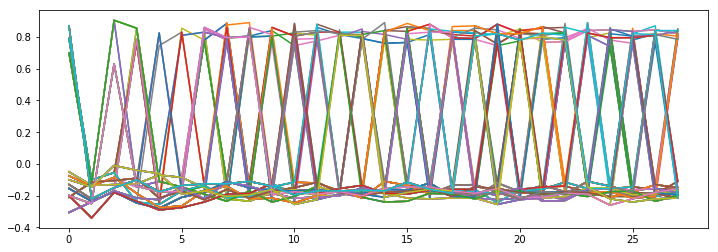

In [5]:
# print(tseries_model_es[1,1,1,:])
# print(ind_returned.shape)
# len(lead_days)

data = tseries_model_es
print(data.shape)
clim_u_test=data[:,:,30,30,:]

fig = plt.figure(figsize=(12,4),facecolor='none')
for ii in range(0,10):
    plt.plot(np.arange(0,28),clim_u_test[ii,:])
     # plt.plot(np.arange(0,28),clim_u_test[:,ii])

print(tseries_model_es[1,0,30,30,:])


In [6]:
# # Anomaly for obs: ERA-5

filedir = '/s2s/hillag/cyclone_00/'
filename = 'daily_merged_2000_2020_00_regrid.nc';
filepath = filedir+filename
print(filepath)
NC = ncread(filepath)  
# get the grid:
latitude_c = NC.variables['lat'][:]
longitude_c = NC.variables['lon'][:]
cyc = NC.variables['INPUT'][:]
NC.close()

#-------

filedir = '/s2s/hillag/cyclone_00/'
filename = 'daily_merged_2000_2020_00_regrid.nc';
filepath = filedir+filename
print(filepath)
NC = ncread(filepath)  
# get the field of the variable we're interested in:
cyc_all = NC.variables['INPUT'][:]
NC.close()


cyc_years = np.transpose(cyc_all,(1,0,2,3))
# compute climatology
cyc_clim = np.mean(cyc_years,axis=0)
# compute anomalies
cyc_anom = cyc_years - cyc_clim

print(cyc_anom.shape)



/s2s/hillag/cyclone_00/daily_merged_2000_2020_00_regrid.nc
/s2s/hillag/cyclone_00/daily_merged_2000_2020_00_regrid.nc
(21, 365, 181, 360)


In [7]:
# 365-28

In [8]:
def get_anomaly_from_obs(cyc_anom,selyear,day_of_year,latitude_c,longitude_c):   
    # average daily field for the first 30 days
    period_len = 28
    add_date = 0
    if day_of_year>336:
        period_len2 = 365-day_of_year
        days_range=np.arange(day_of_year+add_date,day_of_year+add_date+period_len2)
        print(days_range)
        cyc_anom_30d = cyc_anom[:,days_range,:,:]
        yyear = np.arange(2000,2020);
        ind = np.where(yyear == selyear)
        cyc_anom_sel2 = np.squeeze(cyc_anom_30d[ind[0],:,:,:]);
        if cyc_anom_sel2.shape[0]==181:
            cyc_anom_sel2 = cyc_anom_sel2[np.newaxis, :,:]   
        period_len3=period_len-period_len2
        print(np.arange(0+add_date,0+add_date+period_len3))
        cyc_anom_30d = cyc_anom[:,0+add_date:0+add_date+period_len3,:,:]
        yyear = np.arange(2000,2020);
        ind = np.where(yyear == selyear+1)
        cyc_anom_sel3 = np.squeeze(cyc_anom_30d[ind[0],:,:,:]);
        print(cyc_anom_sel2.shape)
        print(cyc_anom_sel3.shape)
        cyc_anom_sel=np.append(cyc_anom_sel2,cyc_anom_sel3,axis=0)
    else:
        days_range=np.arange(day_of_year+add_date,day_of_year+add_date+period_len)
        print(days_range)
        cyc_anom_30d = cyc_anom[:,days_range,:,:]
        yyear = np.arange(2000,2020);
        ind = np.where(yyear == selyear)
        cyc_anom_sel = np.squeeze(cyc_anom_30d[ind[0],:,:,:]);
    print(cyc_anom_sel.shape)
    return cyc_anom_sel

tseries_obs = np.zeros((28,len(latitude_c),len(longitude_c),len(lead_days)))
ssw_ind=0;

for i in range(len(lead_days)):
# for i in range(0,1):
    selday = np.array(lead_days)[i].astype(int)
    selmon= np.array(lead_mons)[i].astype(int)
    selyear = np.array(lead_years)[i].astype(int)
    day_of_year = date(selyear, selmon, selday).timetuple().tm_yday;
    print("Day of year: ", day_of_year, "\n");
    ind_returned_obs = get_anomaly_from_obs(cyc_anom,selyear,day_of_year,latitude_c,longitude_c); 
    tseries_obs[:,:,:,ssw_ind]=ind_returned_obs
    ssw_ind = ssw_ind+1

    

Day of year:  364 

[364]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26]
(1, 181, 360)
(27, 181, 360)
(28, 181, 360)
Day of year:  354 

[354 355 356 357 358 359 360 361 362 363 364]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
(11, 181, 360)
(17, 181, 360)
(28, 181, 360)
Day of year:  48 

[48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75]
(28, 181, 360)
Day of year:  336 

[336 337 338 339 340 341 342 343 344 345 346 347 348 349 350 351 352 353
 354 355 356 357 358 359 360 361 362 363]
(28, 181, 360)
Day of year:  353 

[353 354 355 356 357 358 359 360 361 362 363 364]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
(12, 181, 360)
(16, 181, 360)
(28, 181, 360)
Day of year:  51 

[51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74
 75 76 77 78]
(28, 181, 360)
Day of year:  23 

[23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46
 47 48 49 50]
(28, 181, 360)
Day 

In [9]:
print(tseries_obs[:,30,30,11])

[-0.2857143  -0.38095239 -0.24986494 -0.42261901  0.29775387  0.6161052
  0.52394462 -0.19557834  0.5150497   0.41954172  0.64566475 -0.53879166
  0.61001801  0.45525581  0.59523833  0.55384117 -0.37794247 -0.42857143
  0.59209311  0.57142854  0.36008519  0.19047618  0.41406167 -0.43158132
 -0.49678779 -0.33032355  0.67275393  0.41051167]


In [10]:
# open climatology
fn = './cyc_djfm_clim_week1_lead0.nc'
NC = ncread(fn)
cyc_clim_model = NC.variables['__xarray_dataarray_variable__'][:]

print(cyc_clim_model.shape)

# open climatology obs
fn = './cyc_djfm_clim_obs_week1_lead0.nc'
NC = ncread(fn)
cyc_clim_obs = NC.variables['__xarray_dataarray_variable__'][:]


# load latitude, longitude
selyear = 1979
filedir = '/s2s/hillag/cyclone/'
filename = 'cyc_era_clim_split.nc%s.nc' %(selyear) 
filepath = filedir+filename
print(filepath)
NC = ncread(filepath)  
# get the grid:
latitude_c2 = NC.variables['lat'][:]
longitude_c2 = NC.variables['lon'][:]
NC.close()

print(longitude_c2.shape)

(181, 360)
/s2s/hillag/cyclone/cyc_era_clim_split.nc1979.nc
(361,)


In [11]:
print(tseries_obs.shape)
print(tseries_model_es.shape)

# print(tseries_model_es_em[1,10,10,:])
# print(tseries_obs[1,10,10,:])


# average over the first 28 days
tseries_obs_time_avg=np.nanmean(tseries_obs,axis=0)

tseries_model_es_em = np.mean(tseries_model_es,axis=0)
tseries_model_time_avg_em=np.nanmean(tseries_model_es_em,axis=0)

# ensemble mean
# tseries_model_time_avg_em =np.mean(tseries_model_time_avg,axis=0)

print(tseries_model_time_avg_em.shape)
print(tseries_obs_time_avg.shape)

# average over the first 10 days
# tseries_obs_time_avg=np.nanmean(tseries_obs[np.arange(0,10),:,:,:],axis=0)
# tseries_model_time_avg=np.nanmean(tseries_model_es[np.arange(0,10),:,:,:],axis=0)

# average over all events:
cyc_anom_avg=np.mean(tseries_model_time_avg_em,axis=2)
cyc_anom_avg_obs=np.mean(tseries_obs_time_avg,axis=2)




(28, 181, 360, 14)
(10, 28, 181, 360, 14)
(181, 360, 14)
(181, 360, 14)


In [12]:
from scipy import stats

# % significance for cyc freq anomalies

# Calculate the T-test for the means of two independent samples of scores.
# This is a test for the null hypothesis that 2 independent samples have identical average (expected) values. 
# This test assumes that the populations have identical variances by default.

X=tseries_model_time_avg_em
yy,tt,ll = X.shape
p_array_cyc_model = np.zeros((yy,tt))

for ii in np.arange(0,yy,1):
    for jj in np.arange(0,tt,1):
        ttest_result, p = stats.ttest_ind(X[ii,jj,:], 0*X[ii,jj,:])
        p_array_cyc_model[ii,jj]=p
        
p_array_cyc_model.shape
# ---------------------------------
X=tseries_obs_time_avg
yy,tt,ll = X.shape
p_array_cyc_obs = np.zeros((yy,tt))

for ii in np.arange(0,yy,1):
    for jj in np.arange(0,tt,1):
        ttest_result, p = stats.ttest_ind(X[ii,jj,:], 0*X[ii,jj,:])
        p_array_cyc_obs[ii,jj]=p
        
p_array_cyc_obs.shape
# ---------------------------------
# cyc_anom_avg-cyc_anom_avg_obs[::-1,:]
# ---------------------------------
X=tseries_model_time_avg_em
Y=tseries_obs_time_avg[::-1,0:360,:]
# Y=np.roll(tseries_obs_time_avg[::-1,0:360,:],180, axis=1)
yy,tt,ll = X.shape
p_array_cyc_diff = np.zeros((yy,tt))

for ii in np.arange(0,yy,1):
    for jj in np.arange(0,tt,1):
        ttest_result, p = stats.ttest_ind(X[ii,jj,:]-Y[ii,jj,:], 0*X[ii,jj,:])
        p_array_cyc_diff[ii,jj]=p

        
p_array_cyc_diff.shape
# ---------------------------------
# # significance of regression coeff
# # from scipy.stats import bootstrap

# X=diffU_djf_em_models[:,:,:]
# yy,tt,ll = X.shape

# # data = (S_array,) 
# # print(data.shape)
# # res = bootstrap(data, np.std, confidence_level=0.9, random_state=rng)
# # print(res.confidence_interval)

# n_trials = 1000
# ci_contains_true_std = 0
# for i in range(n_trials):
#     data = (dist.rvs(size=100, random_state=rng),)
#     ci = bootstrap(data, np.std, confidence_level=0.95, n_resamples=1000, random_state=rng).confidence_interval
#     if ci[0] < std_true < ci[1]:
#         ci_contains_true_std += 1
        
# print(ci_contains_true_std)
# ---------------------------------




(181, 360)

In [47]:
tseries_model_es.shape

(10, 28, 181, 360, 14)

In [48]:
import matplotlib.patches as patches

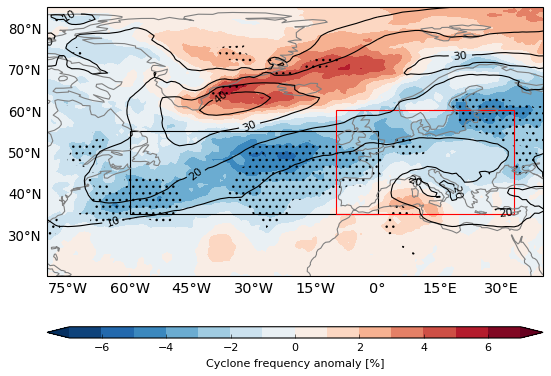

In [49]:
# plot mean response averaged over all events:


# Plot cyclone for all events:
#-----------------------------
plt.style.use('classic')

#create the figure default:
fig = plt.figure(figsize=(8,8),facecolor='none')
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-80, 40, 20, 80], crs=ccrs.PlateCarree())
# ax.add_feature(cfeature.LAND.with_scale('110m'))

color = 'RdBu_r' ##'PuBu' 
#colorbar options:
colorbarMin=-7
colorbarMax=7
colorspace=1
clevel = np.arange(colorbarMin,colorbarMax+colorspace,colorspace)
 
colorbarMin=0
colorbarMax=50
colorspace=10
clevel2 = np.arange(colorbarMin,colorbarMax+colorspace,colorspace)

def fmt(x):
    s = f"{x:.1f}"
    if s.endswith("0"):
        s = f"{x:.0f}"
    return rf"{s} \%" if plt.rcParams["text.usetex"] else f"{s}"

# set hatching for each level
hatches =  ['', '..']
p_levels = [0.0, 0.05]

#plot your field:
flag_anom_sel, cyclic_lons = add_cyclic_point(cyc_anom_avg, coord=longitude)
flag_ensm_clim, cyclic_lons = add_cyclic_point(cyc_clim_model, coord=longitude)
flag_ensm_stat, cyclic_lons = add_cyclic_point(p_array_cyc_model, coord=longitude)


h1 = ax.contourf(cyclic_lons,latitude, 100*flag_anom_sel, clevel, cmap=color,extend='both')
h2 = ax.contour(cyclic_lons,latitude, 100*flag_ensm_clim,clevel2,colors=['black'],linewidths=1)
ax.clabel(h2, h2.levels, inline=True, fmt=fmt,fontsize=10)
hs = ax.contourf(cyclic_lons, latitude, flag_ensm_stat, levels=p_levels, hatches=hatches,
                  colors='none',extend='both')


#plot the colorbar:
cbar = plt.colorbar(h1, orientation='horizontal', shrink=1,fraction=0.1,pad=0.1,aspect=40)
cbar.ax.tick_params(labelsize=10) 
colorLabel='Cyclone frequency anomaly [%]' #$FLAG$
cbar.set_label(label=colorLabel,fontsize=10)

ax.coastlines(color='grey')
ax.set_extent([-80, 40, 20, 80])
# ax.gridlines(draw_labels=True, dms=True, x_inline=True, y_inline=False)

# N.A. box: add rect xy, width, height
rect = patches.Rectangle((-60, 35), 60, 20, linewidth=1, edgecolor='k', facecolor='none')
# Add the patch to the Axes
ax.add_patch(rect)

# Eur box: add rect xy, width, height
rect = patches.Rectangle((-10, 35), 43, 25, linewidth=1, edgecolor='r', facecolor='none')
# Add the patch to the Axes
ax.add_patch(rect)


ax.set_xticks([45])
# matplotlib.pyplot.xlabel("Longitude")
# matplotlib.pyplot.ylabel("Latitude")
ax.set_visible(True)

# someX, someY = 20, 20
# fig,ax = plt.subplots()
# currentAxis = plt.gca()
# currentAxis.add_patch(Rectangle((someX - 2, someY - 2), 0.2, 0.2,alpha=1, facecolor='none'))

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
gl.xlabels_top = False
gl.ylabels_right = False
gl.xlines = False
gl.ylines = False
# gl.xlocator = mticker.FixedLocator([-180, -45, 0, 45, 180])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 13, 'color': 'black'}


savelocation="Figures/"
savefileName='cyc_anom_spv_vortex_events.pdf'
fig.savefig(savelocation+savefileName)
# fig.savefig(savelocation+savefileName, format='pdf',dpi=300)





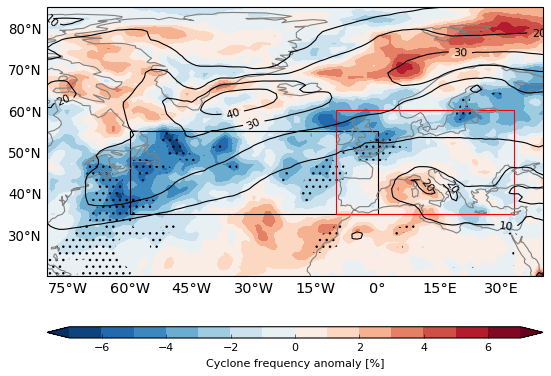

In [50]:
# plot mean response averaged over all events:


# Plot cyclone for all events:
#-----------------------------
plt.style.use('classic')

#create the figure default:
fig = plt.figure(figsize=(8,8),facecolor='none')
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-80, 40, 20, 80], crs=ccrs.PlateCarree())
# ax.add_feature(cfeature.LAND.with_scale('110m'))

color = 'RdBu_r' ##'PuBu' 
#colorbar options:
colorbarMin=-7
colorbarMax=7
colorspace=1
clevel = np.arange(colorbarMin,colorbarMax+colorspace,colorspace)

colorbarMin=0
colorbarMax=50
colorspace=10
clevel2 = np.arange(colorbarMin,colorbarMax+colorspace,colorspace)

def fmt(x):
    s = f"{x:.1f}"
    if s.endswith("0"):
        s = f"{x:.0f}"
    return rf"{s} \%" if plt.rcParams["text.usetex"] else f"{s}"

# set hatching for each level
hatches =  ['', '..']
p_levels = [0.0, 0.05]


#plot your field:
flag_anom_sel, cyclic_lons = add_cyclic_point(cyc_anom_avg_obs, coord=longitude_c)
flag_ensm_clim, cyclic_lons2 = add_cyclic_point(cyc_clim_obs, coord=longitude_c2)
flag_ensm_stat, cyclic_lons = add_cyclic_point(p_array_cyc_obs, coord=longitude_c)


h1 = ax.contourf(cyclic_lons,latitude_c, 100*flag_anom_sel, clevel, cmap=color,extend='both')
h2 = ax.contour(cyclic_lons2,latitude_c, 100*flag_ensm_clim,clevel2,colors=['black'],linewidths=1)
ax.clabel(h2, h2.levels, inline=True, fmt=fmt,fontsize=10)
hs = ax.contourf(cyclic_lons, latitude_c, flag_ensm_stat, levels=p_levels, hatches=hatches,
                  colors='none',extend='both')


#plot the colorbar:
cbar = plt.colorbar(h1, orientation='horizontal', shrink=1,fraction=0.1,pad=0.1,aspect=40)
cbar.ax.tick_params(labelsize=10) 
colorLabel='Cyclone frequency anomaly [%]' #$FLAG$
cbar.set_label(label=colorLabel,fontsize=10)

ax.coastlines(color='grey')
ax.set_extent([-80, 40, 20, 80])
# ax.gridlines(draw_labels=True, dms=True, x_inline=True, y_inline=False)

# N.A. box: add rect xy, width, height
rect = patches.Rectangle((-60, 35), 60, 20, linewidth=1, edgecolor='k', facecolor='none')
# Add the patch to the Axes
ax.add_patch(rect)

# Eur box: add rect xy, width, height
rect = patches.Rectangle((-10, 35), 43, 25, linewidth=1, edgecolor='r', facecolor='none')
# Add the patch to the Axes
ax.add_patch(rect)


ax.set_xticks([45])
# matplotlib.pyplot.xlabel("Longitude")
# matplotlib.pyplot.ylabel("Latitude")
ax.set_visible(True)

# someX, someY = 20, 20
# fig,ax = plt.subplots()
# currentAxis = plt.gca()
# currentAxis.add_patch(Rectangle((someX - 2, someY - 2), 0.2, 0.2,alpha=1, facecolor='none'))

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
gl.xlabels_top = False
gl.ylabels_right = False
gl.xlines = False
gl.ylines = False
# gl.xlocator = mticker.FixedLocator([-180, -45, 0, 45, 180])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 13, 'color': 'black'}
# gl.xlabel_style = {'color': 'red', 'weight': 'bold'}


savelocation="Figures/"
savefileName='cyc_anom_spv_vortex_events_obs.pdf'
fig.savefig(savelocation+savefileName)
# fig.savefig(savelocation+savefileName, format='pdf',dpi=300)



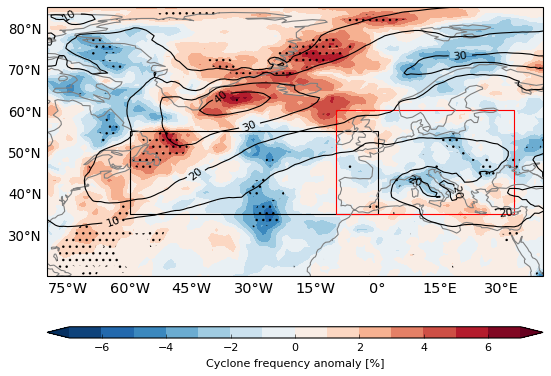

In [51]:
# plot mean response averaged over all events:

# plot mean response averaged over all events:


# Plot cyclone for all events:
#-----------------------------
plt.style.use('classic')

#create the figure default:
fig = plt.figure(figsize=(8,8),facecolor='none')
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-80, 40, 20, 80], crs=ccrs.PlateCarree())
# ax.add_feature(cfeature.LAND.with_scale('110m'))

color = 'RdBu_r' ##'PuBu' 
#colorbar options:
colorbarMin=-7
colorbarMax=7
colorspace=1
clevel = np.arange(colorbarMin,colorbarMax+colorspace,colorspace)

colorbarMin=0
colorbarMax=50
colorspace=10
clevel2 = np.arange(colorbarMin,colorbarMax+colorspace,colorspace)

# set hatching for each level
hatches =  ['', '..']
p_levels = [0.0, 0.10]

#plot your field:
X=tseries_model_time_avg_em
Y=tseries_obs_time_avg[::-1,:,:]
          
# flag_anom_sel, cyclic_lons = add_cyclic_point(cyc_anom_avg-cyc_anom_avg_obs[::-1,:], coord=longitude)
flag_anom_sel, cyclic_lons = add_cyclic_point(np.mean(X,axis=2)-np.mean(Y,axis=2), coord=longitude)
flag_ensm_clim, cyclic_lons = add_cyclic_point(cyc_clim_model, coord=longitude)
flag_ensm_stat, cyclic_lons = add_cyclic_point(p_array_cyc_diff, coord=longitude)


h1 = ax.contourf(cyclic_lons,latitude, 100*flag_anom_sel, clevel, cmap=color,extend='both')
h2 = ax.contour(cyclic_lons,latitude, 100*flag_ensm_clim,clevel2,colors=['black'],linewidths=1)
ax.clabel(h2, h2.levels, inline=True, fmt=fmt,fontsize=10)
hs = ax.contourf(cyclic_lons, latitude, flag_ensm_stat, levels=p_levels, hatches=hatches,
                  colors='none',extend='both')


#plot the colorbar:
cbar = plt.colorbar(h1, orientation='horizontal', shrink=1,fraction=0.1,pad=0.1,aspect=40)
cbar.ax.tick_params(labelsize=10) 
colorLabel='Cyclone frequency anomaly [%]' #$FLAG$
cbar.set_label(label=colorLabel,fontsize=10)

ax.coastlines(color='grey')
ax.set_extent([-80, 40, 20, 80])
# ax.gridlines(draw_labels=True, dms=True, x_inline=True, y_inline=False)

# N.A. box: add rect xy, width, height
rect = patches.Rectangle((-60, 35), 60, 20, linewidth=1, edgecolor='k', facecolor='none')
# Add the patch to the Axes
ax.add_patch(rect)

# Eur box: add rect xy, width, height
rect = patches.Rectangle((-10, 35), 43, 25, linewidth=1, edgecolor='r', facecolor='none')
# Add the patch to the Axes
ax.add_patch(rect)


ax.set_xticks([45])
# matplotlib.pyplot.xlabel("Longitude")
# matplotlib.pyplot.ylabel("Latitude")
ax.set_visible(True)

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
gl.xlabels_top = False
gl.ylabels_right = False
gl.xlines = False
gl.ylines = False
# gl.xlocator = mticker.FixedLocator([-180, -45, 0, 45, 180])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 13, 'color': 'black'}


from matplotlib.patches import Rectangle

# Add the patch to the Axes
# left, bottom, width, height 
plt.gca().add_patch(Rectangle((300,150),60,20,linewidth=1,edgecolor='k',facecolor='none'))


savelocation="Figures/"
savefileName='cyc_anom_diff_spv_model_minus_obs.pdf'
fig.savefig(savelocation+savefileName)


In [18]:
# subtropical latitudes:

# check agreement among events - model
print(tseries_model_es.shape)

# average anomaly over box
# central Atlantic
latidx1 = np.where((latitude >=35) & (latitude <=55))
lonidx1 = np.where((longitude >=300) & (longitude <360)) 
tseries_model_es_region = tseries_model_es[:,:,latidx1[0],:,:]
tseries_model_es_region = tseries_model_es_region[:,:,:,lonidx1[0],:]
tseries_model_es_atl = np.mean(np.mean(tseries_model_es_region,axis=2),axis=2)
print(tseries_model_es_atl.shape)

# average over selceted period:
tseries_model_es_atl_avg = np.mean(tseries_model_es_atl,axis=1)

counter_how_many_negative_model = np.zeros_like(range(0,arr_len))
counter_how_many_positive_model = np.zeros_like(range(0,arr_len))
# count how many members (in %) show positive/negative anomaly
for ii in range(0,arr_len):
    # print(ii)
    counter = 0*np.arange(2)
    counter[0] = np.count_nonzero(tseries_model_es_atl_avg[:,ii] < 0)
    counter[1] = np.count_nonzero(tseries_model_es_atl_avg[:,ii] > 0)
    counter_how_many_negative_model[ii]=counter[0]
    counter_how_many_positive_model[ii]=counter[1]
    # return counter;

# 

# check agreement among events - obs
print(tseries_obs.shape)

# average anomaly over box
# central Atlantic
latidx1_c = np.where((latitude_c >=35) & (latitude_c <=55));
lonidx1_c = np.where((longitude_c >=300) & (longitude_c <=360));
def Reverse(tuples):
    new_tup = tuples[::-1]
    return new_tup

latidx1_c_r = Reverse(latidx1_c[0])
print(lonidx1_c[0])
print(latidx1_c_r)

tseries_obs_region = tseries_obs[:,latidx1_c[0],:,:]
tseries_obs_region = tseries_obs_region[:,:,lonidx1_c[0],:]
tseries_obs_atl = np.mean(np.mean(tseries_obs_region,axis=1),axis=1)
print(tseries_obs_atl.shape)

# average over selceted period:
tseries_obs_atl_avg = np.mean(tseries_obs_atl,axis=0)

counter_how_many_negative_obs = np.zeros_like(range(0,arr_len))
counter_how_many_positive_obs = np.zeros_like(range(0,arr_len))
# count how many members (in %) show positive/negative anomaly
for ii in range(0,arr_len):
    # print(ii)
    counter = 0*np.arange(2)
    counter[0] = np.count_nonzero(tseries_obs_atl_avg[ii] < 0)
    counter[1] = np.count_nonzero(tseries_obs_atl_avg[ii] > 0)
    counter_how_many_negative_obs[ii]=counter[0]
    counter_how_many_positive_obs[ii]=counter[1]
    # return counter;
    

count_if_correct = 0*np.arange(arr_len);
count_if_correct_pos=0*np.arange(arr_len)
count_if_correct_neg=0*np.arange(arr_len)
# check if the sign of the anomaly is the same
for i in range(arr_len):
    if counter_how_many_positive_obs[i] == 1:
        print(i, "response is positive")
        count_if_correct[i] = counter_how_many_positive_model[i];
        if counter_how_many_positive_model[i] > 5:
            count_if_correct_pos[i] = 1
    if counter_how_many_negative_obs[i] == 1:
        print(i, "response is negative")
        count_if_correct[i] = counter_how_many_negative_model[i];
        if counter_how_many_negative_model[i] > 5:
            count_if_correct_neg[i] = 1
        
count_if_correct1 = (count_if_correct / 10)*100;

print(count_if_correct1)

arr_len_pos = np.sum(counter_how_many_positive_obs)
arr_len_neg = np.sum(counter_how_many_negative_obs)

# load all 28-day means in Jan
%store -r anom_cyc_per_lead_date_djf
print(anom_cyc_per_lead_date_djf.shape)
anom_cyc_jan_es_region = anom_cyc_per_lead_date_djf[:,:,latidx1[0],:,:]
anom_cyc_jan_es_region = anom_cyc_jan_es_region[:,:,:,lonidx1[0],:]
anom_cyc_jan_atl = np.mean(np.mean(anom_cyc_jan_es_region,axis=2),axis=2)
print(anom_cyc_jan_atl.shape)

(10, 28, 181, 360, 14)
(10, 28, 14)
(28, 181, 360, 14)
[300 301 302 303 304 305 306 307 308 309 310 311 312 313 314 315 316 317
 318 319 320 321 322 323 324 325 326 327 328 329 330 331 332 333 334 335
 336 337 338 339 340 341 342 343 344 345 346 347 348 349 350 351 352 353
 354 355 356 357 358 359]
[145 144 143 142 141 140 139 138 137 136 135 134 133 132 131 130 129 128
 127 126 125]
(28, 14)
0 response is negative
1 response is negative
2 response is negative
3 response is negative
4 response is negative
5 response is negative
6 response is positive
7 response is positive
8 response is negative
9 response is negative
10 response is positive
11 response is negative
12 response is positive
13 response is negative
[100. 100.  90.  70. 100.  90.  20. 100.  40.  70.   0. 100.  60.  90.]
(10, 20, 181, 360, 3)
(10, 20, 3)


In [19]:


# compute ens spread
tseries_model_es_sig = np.std(tseries_model_es,axis=0)



In [20]:
# ens bias and spread as a function of latitude 
tseries_model_es_ensmean = np.mean(tseries_model_es,axis=0)

# ens bias
tseries_model_es_bias = tseries_model_es_ensmean - tseries_obs
# tseries_model_es_bias = tseries_model_es - tseries_obs

# ---- for the bias (from obs)------
latidx1 = np.where((latitude >=30) & (latitude <=70))
lonidx1 = np.where((longitude >=300) & (longitude <360)) 
tseries_model_es_region2 = tseries_model_es_bias[:,latidx1[0],:,:]
tseries_model_es_region2 = tseries_model_es_region2[:,:,lonidx1[0],:]
tseries_model_bias_atl = np.mean(tseries_model_es_region2,axis=2)
print(tseries_model_bias_atl.shape)

# average all events
tseries_model_bias_atl_allevents=np.mean(tseries_model_bias_atl,axis=2)

print(tseries_model_bias_atl_allevents.shape)


# ------ for the spread ------
latidx1 = np.where((latitude >=30) & (latitude <=70))
lonidx1 = np.where((longitude >=300) & (longitude <360)) 
tseries_model_es_region3 = tseries_model_es_sig[:,latidx1[0],:,:]
tseries_model_es_region3 = tseries_model_es_region3[:,:,lonidx1[0],:]
tseries_model_spread_atl = np.mean(tseries_model_es_region3,axis=2)
print(tseries_model_spread_atl.shape)

# average over selceted period:
# tseries_model_spread_atl_avg = np.mean(tseries_model_spread_atl,axis=1)

# average all events
tseries_model_spread_atl_allevents=np.mean(tseries_model_spread_atl,axis=2)
print(tseries_model_spread_atl_allevents.shape)

# ------ for the mean ------

latidx1 = np.where((latitude >=30) & (latitude <=70))
lonidx1 = np.where((longitude >=300) & (longitude <360)) 
tseries_model_es_region4 = tseries_model_es_ensmean[:,latidx1[0],:,:]
tseries_model_es_region4 = tseries_model_es_region4[:,:,lonidx1[0],:]
tseries_model_ensmean_atl = np.mean(tseries_model_es_region4,axis=2)
print(tseries_model_ensmean_atl.shape)

# average over selceted period:
# tseries_model_spread_atl_avg = np.mean(tseries_model_spread_atl,axis=1)

# average all events
tseries_model_ensmean_atl_allevents=np.mean(tseries_model_ensmean_atl,axis=2)
print(tseries_model_ensmean_atl_allevents.shape)

tseries_model_es_region2=[]
tseries_model_es_region3=[]
tseries_model_es_region4=[]


# ---------------------
# ----- ens mean for selected region ---

latidx1 = np.where((latitude >=35) & (latitude <=55))
lonidx1 = np.where((longitude >=300) & (longitude <360)) 
tseries_model_es_region2 = tseries_model_es_ensmean[:,latidx1[0],:,:]
tseries_model_es_region2 = tseries_model_es_region2[:,:,lonidx1[0],:]
tseries_model_ensmean_atl_box = np.mean(np.mean(tseries_model_es_region2,axis=1),axis=1)

# average over selceted period:
tseries_model_ensmean_atl_box_avg = np.mean(tseries_model_ensmean_atl_box,axis=0)

print(tseries_model_ensmean_atl_box_avg.shape)

# ----- ens spread for selected region ---
latidx1 = np.where((latitude >=35) & (latitude <=55))
lonidx1 = np.where((longitude >=300) & (longitude <360)) 
tseries_model_es_region3 = tseries_model_es_sig[:,latidx1[0],:,:]
tseries_model_es_region3 = tseries_model_es_region3[:,:,lonidx1[0],:]
tseries_model_spread_atl_box = np.mean(np.mean(tseries_model_es_region3,axis=1),axis=1)

# average over selceted period:
tseries_model_spread_atl_box_avg = np.mean(tseries_model_spread_atl_box,axis=0)

print(tseries_model_spread_atl_box_avg.shape)


# tseries_model_es_region2=[]
# tseries_model_es_region3=[]


(28, 41, 14)
(28, 41)
(28, 41, 14)
(28, 41)
(28, 41, 14)
(28, 41)
(14,)
(14,)


In [21]:
print(counter_how_many_negative_obs)

y_star_neg=np.nan*np.copy(counter_how_many_negative_obs)
y_star_pos=np.nan*np.copy(counter_how_many_positive_obs)

y_star_pos = np.where(counter_how_many_negative_obs==0, 100, np.nan)
y_star_neg = np.where(counter_how_many_negative_obs==0, np.nan, 100)

print(y_star_neg)
print(y_star_pos)

# # y_star_pos = np.array([100, 100, np.nan, np.nan, 100, 100, np.nan, 100, 100, 100, 100, 100, 100, np.nan])
# # y_star_neg = np.array([np.nan, np.nan, 100, 100,np.nan,np.nan,100,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,100])


[1 1 1 1 1 1 0 0 1 1 0 1 0 1]
[100. 100. 100. 100. 100. 100.  nan  nan 100. 100.  nan 100.  nan 100.]
[ nan  nan  nan  nan  nan  nan 100. 100.  nan  nan 100.  nan 100.  nan]


In [22]:
counter_how_many_negative_obs[::-1]

array([1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1])

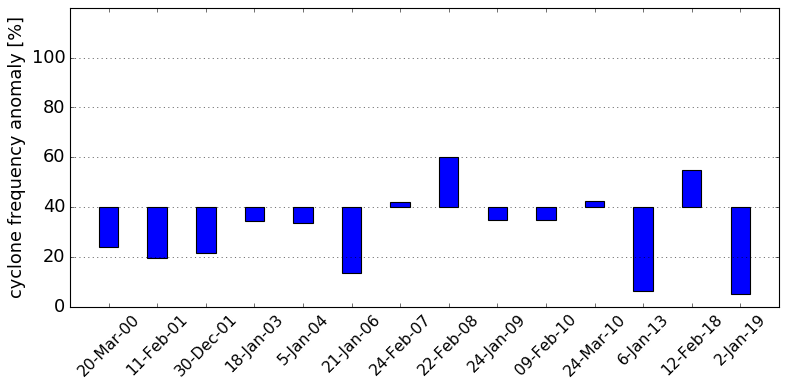

In [23]:
# % NEW: plot amplitude of anomly per event

# this plot shows how many negative / positive per SSW

#,'26-Feb-99','15-Dec-98'

# labels = ['-5 to -1', '-10 to -6', '-15 to -11', '-20 to -16']
labels = ['2-Jan-19', '12-Feb-18', '6-Jan-13', '24-Mar-10','09-Feb-10','24-Jan-09','22-Feb-08','24-Feb-07',\
          '21-Jan-06','5-Jan-04','18-Jan-03','30-Dec-01','11-Feb-01','20-Mar-00']
labels_rev = labels[::-1];
# [1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0]
labels_rev_pos=['20-Mar-00','11-Feb-01','','','5-Jan-04','21-Jan-06','','22-Feb-08',\
               '24-Jan-09','09-Feb-10','24-Mar-10','6-Jan-13','12-Feb-18','']
#neg: ,'18-Jan-03','30-Dec-01','24-Feb-07','2-Jan-19'

x = np.arange(len(labels))  # the label locations
width = 0.5  # the width of the bars
# counter_how_many_positive2 = (counter_how_many_positive_model[::-1]/10)*100
# counter_how_many_negative2 = (counter_how_many_negative_model[::-1]/10)*100


fig, ax = plt.subplots(figsize=(10,5),facecolor='none')
# fig = plt.figure(facecolor='none')

rects1 = ax.bar(x[0:14] , 100*tseries_obs_atl_avg[0:14], width=0.4, \
                color='blue',edgecolor='k',label='Increased cyclone frequency', align='center')
# rects2 = ax.bar(x[0:14] , counter_how_many_negative2[0:14], width=0.4, \
#                 bottom=counter_how_many_positive2[0:14], color='lightskyblue',edgecolor='w',label='Reduced cyclone frequency', align='center')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('cyclone frequency anomaly [%]', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(labels_rev, fontsize=14,rotation=45)
# ax.set_xticklabels(labels_rev_pos, fontsize=14,rotation=45,fontweight='bold')
# ax.legend(loc='best', fontsize=10)
ax.set_yticklabels([0,20,40,60,80,100], fontsize=16)
ax.scatter(x, y_star_neg[::-1]+5, s=100, marker='*', color='blue', zorder=3)
ax.scatter(x, y_star_pos[::-1]+5, s=100, marker='*', color='red', zorder=3)

fig.tight_layout()
plt.ylim(-10,20)
plt.xlim(-0.8,13.8)
plt.grid(axis='y') 
plt.show()

savelocation="Figures/"
savefileName='avg_cyc_anom_atl_spv_show_sign_model_30to50.pdf'
fig.savefig(savelocation+savefileName)

In [24]:
print(count_if_correct_pos)
print(count_if_correct_neg)



[0 0 0 0 0 0 0 1 0 0 0 0 1 0]
[1 1 1 1 1 1 0 0 0 1 0 1 0 1]


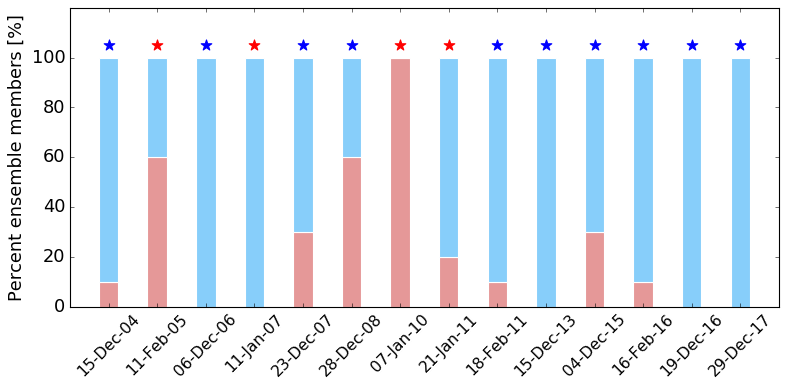

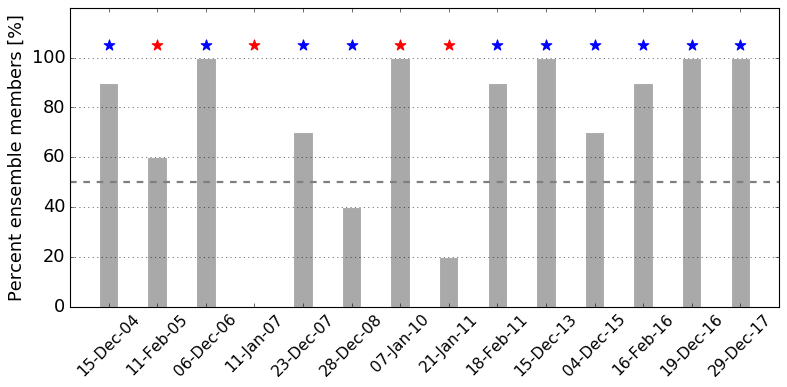

In [25]:
# this plot shows how many negative / positive per SPV

labels = ['29-Dec-17', '19-Dec-16', '16-Feb-16', '04-Dec-15', '15-Dec-13','18-Feb-11',\
          '21-Jan-11','07-Jan-10','28-Dec-08','23-Dec-07',\
          '11-Jan-07','06-Dec-06','11-Feb-05','15-Dec-04']
labels_rev = labels[::-1];
# pos:[0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0]
# labels_rev_pos=['20-Mar-00','11-Feb-01','','','5-Jan-04','21-Jan-06','','22-Feb-08',\
#                '24-Jan-09','09-Feb-10','24-Mar-10','6-Jan-13','12-Feb-18','']
#neg: ,'18-Jan-03','30-Dec-01','24-Feb-07','2-Jan-19'

x = np.arange(len(labels))  # the label locations
width = 0.5  # the width of the bars
counter_how_many_positive2 = (counter_how_many_positive_model[::-1]/10)*100
counter_how_many_negative2 = (counter_how_many_negative_model[::-1]/10)*100


fig, ax = plt.subplots(figsize=(10,5),facecolor='none')
# fig = plt.figure(facecolor='none')

rects1 = ax.bar(x[0:14] , counter_how_many_positive2[0:14], width=0.4, \
                color=(0.8, 0.2, 0.2, 0.5),edgecolor='w',label='Increased cyclone frequency', align='center')
rects2 = ax.bar(x[0:14] , counter_how_many_negative2[0:14], width=0.4, \
                bottom=counter_how_many_positive2[0:14], color='lightskyblue',edgecolor='w',label='Reduced cyclone frequency', align='center')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percent ensemble members [%]', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(labels_rev, fontsize=14,rotation=45)
# ax.set_xticklabels(labels_rev_pos, fontsize=14,rotation=45,fontweight='bold')
# ax.legend(loc='best', fontsize=10)
ax.set_yticklabels([0,20,40,60,80,100], fontsize=16)
ax.scatter(x, y_star_neg[::-1]+5, s=100, marker='*', color='blue', zorder=3)
ax.scatter(x, y_star_pos[::-1]+5, s=100, marker='*', color='red', zorder=3)

fig.tight_layout()
plt.ylim(0,120)
plt.xlim(-0.8,13.8)
# plt.grid(axis='y')
plt.show()

savelocation="Figures/"
savefileName='bar_cyc_anom_atl_spv_show_sign_model_30to50.pdf'
fig.savefig(savelocation+savefileName)

# ---------


# this plot shows how many negative / positive per SSW

#,'26-Feb-99','15-Dec-98'
# labels = ['29-Dec-17', '19-Dec-16', '16-Feb-16', '04-Dec-15', '15-Dec-13','18-Feb-11',\
#           '21-Jan-11','07-Jan-10','28-Dec-08','23-Dec-07',\
#           '11-Jan-07','06-Dec-06','11-Feb-05','15-Dec-04']
labels_rev = labels[::-1];
x = np.arange(len(labels))  # the label locations
width = 0.5  # the width of the bars
count_if_correct2 = count_if_correct1[::-1];


fig, ax = plt.subplots(figsize=(10,5),facecolor='none')
# fig = plt.figure(facecolor='none')
#(0.8, 0.9, 0.2, 0.9))
xs = np.arange(-0.8,14,0.1)
horiz_line = np.array([50 for i in range(len(xs))])
plt.plot(xs, horiz_line, 'k--', color='grey',linewidth=2) 
rects1 = ax.bar(x[0:14], count_if_correct2[0:14], width=0.4, \
                color='darkgrey', edgecolor='w', \
                label='cyclone frequency successfully predicted')

ax.scatter(x, y_star_neg[::-1]+5, s=100, marker='*', color='blue', zorder=3)
ax.scatter(x, y_star_pos[::-1]+5, s=100, marker='*', color='red', zorder=3)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percent ensemble members [%]', fontsize=16)
# ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels_rev, fontsize=14,rotation=45)
# ax.legend(loc='best', fontsize=14)
ax.set_yticklabels([0,20,40,60,80,100], fontsize=16)
plt.grid(axis='y')

fig.tight_layout()
plt.ylim(0,120)
plt.xlim(-0.8,13.8)
plt.show()

savelocation="Figures/"
savefileName='bar_cyc_anom_atl_spv_if_correct_sign_30to_50.pdf'
fig.savefig(savelocation+savefileName)






[23.571428571428573, 76.42857142857143]


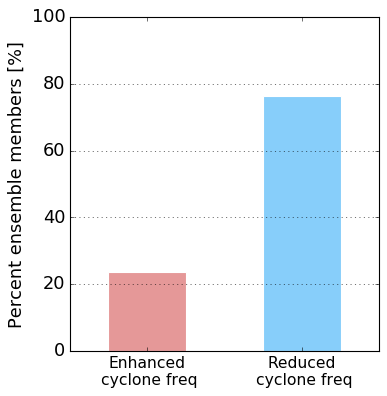

In [26]:
# this plot shows how many negative / positive per SSW

#,'26-Feb-99','15-Dec-98'

labels = ['29-Dec-17', '19-Dec-16', '16-Feb-16', '04-Dec-15', '15-Dec-13','18-Feb-11',\
          '21-Jan-11','07-Jan-10','28-Dec-08','23-Dec-07',\
          '11-Jan-07','06-Dec-06','11-Feb-05','15-Dec-04']
labels_rev = labels[::-1];
x=[0,1] #np.arange(2)
width = 0.5  # the width of the bars
counter_how_many_positive2 = np.mean((counter_how_many_positive_model[::-1]/10)*100)
counter_how_many_negative2 = np.mean((counter_how_many_negative_model[::-1]/10)*100)
y=[counter_how_many_positive2,counter_how_many_negative2]
print(y)

fig, ax = plt.subplots(figsize=(5,5),facecolor='none')

rects1 = ax.bar(x[0] , y[0], width, color=(0.8, 0.2, 0.2, 0.5),edgecolor='w',label='Increased cyclone frequency')
rects2 = ax.bar(x[1] , y[1], width, color='lightskyblue',edgecolor='w',label='Reduced cyclone frequency')
# rects1 = ax.bar(x , y, width, color='grey',label='Increased cyclone frequency')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percent ensemble members [%]', fontsize=16)
# ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(['Enhanced\n cyclone freq','Reduced\n cyclone freq'], fontsize=14,rotation=0)
# ax.legend(loc='best', fontsize=14)
ax.set_yticklabels([0,20,40,60,80,100], fontsize=16)
fig.tight_layout()
plt.ylim(0,100)
plt.xlim(-0.5,1.5)
plt.grid(axis='y') 
plt.show()

savelocation="Figures/"
savefileName='bar_cyc_anom_atl_spv_show_sign_model_30to50_mean.pdf'
fig.savefig(savelocation+savefileName)


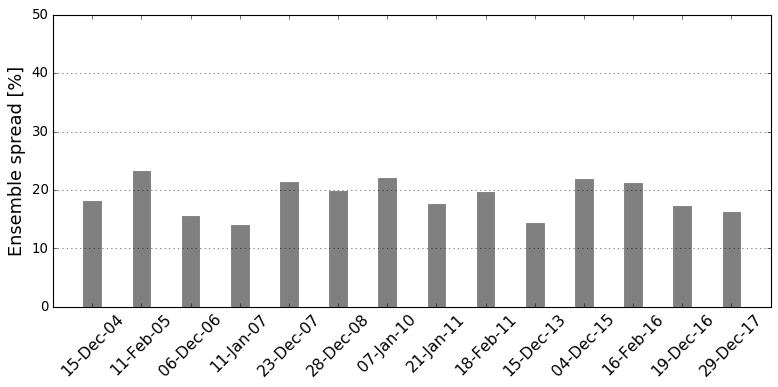

In [27]:
# % plot ens spread for all events
# (1) as a function of latitude
# (2) as a function of lead time?
# The ensemble spread is a measure of the differences between the 50 ensemble members 
# plus the control member and is 
# represented by the standard deviation with respect to the ensemble mean. 
# Small spread indicates lower uncertainty, large spread indicates higher uncertainty.

labels = ['29-Dec-17', '19-Dec-16', '16-Feb-16', '04-Dec-15', '15-Dec-13','18-Feb-11',\
          '21-Jan-11','07-Jan-10','28-Dec-08','23-Dec-07',\
          '11-Jan-07','06-Dec-06','11-Feb-05','15-Dec-04']
labels_rev = labels[::-1];

x = np.arange(len(labels))  # the label locations
width = 0.5  # the width of the bars
counter_how_many_positive2 = (counter_how_many_positive_model[::-1]/10)*100
counter_how_many_negative2 = (counter_how_many_negative_model[::-1]/10)*100


fig, ax = plt.subplots(figsize=(10,5),facecolor='none')
# fig = plt.figure(facecolor='none')

rects1 = ax.bar(x[0:14] , 100*tseries_model_spread_atl_box_avg[::-1], width=0.4, \
                color='grey',edgecolor='w',label='spread', align='center')
# rects2 = ax.bar(x[0:14] , tseries_model_ensmean_atl_box_avg[0:14], width=0.4, \
#                  bottom=counter_how_many_positive2[0:14], color='lightskyblue',edgecolor='w',label='Reduced cyclone frequency', align='center')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Ensemble spread [%]', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(labels_rev, fontsize=14,rotation=45)
# ax.set_xticklabels(labels_rev_pos, fontsize=14,rotation=45,fontweight='bold')
# ax.legend(loc='best', fontsize=10)
# ax.set_yticklabels([0,0.2,0.4,0.6,0.8,1.0], fontsize=16)
ax.scatter(x, y_star_neg[::-1]+5, s=100, marker='*', color='blue', zorder=3)
ax.scatter(x, y_star_pos[::-1]+5, s=100, marker='*', color='red', zorder=3)

fig.tight_layout()
plt.ylim(0,50)
plt.xlim(-0.8,13.8)
plt.grid(axis='y') 
plt.show()

savelocation="Figures/"
savefileName='spread_atl_spv_show_sign_model_30to50.pdf'
fig.savefig(savelocation+savefileName)

# ---------


[0.5, 0.9, 0]
[2, 9]
[4, 10]


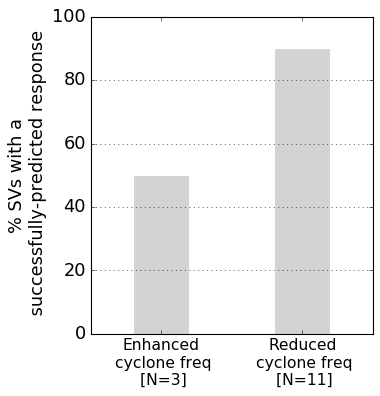

[0.5, 0.9, 0]
[2, 9]
[4, 10]


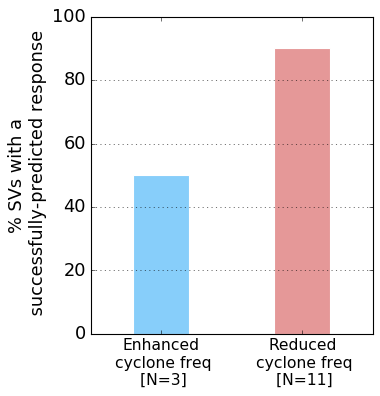

In [28]:
# ---------


# ---------


x=[0,1] #np.arange(2)
width = 0.4  # the width of the bars
c_positive2 = np.sum(count_if_correct_pos)
c_negative2 = np.sum(count_if_correct_neg)
y=[c_positive2/arr_len_pos,c_negative2/arr_len_neg,0]
# y=[c_positive2/arr_len,c_negative2/arr_len,(arr_len-c_positive2-c_negative2)/arr_len]

print(y)
print([c_positive2,c_negative2])
print([arr_len_pos,arr_len_neg])


fig, ax = plt.subplots(figsize=(5,5),facecolor='none')

# rects1 = ax.bar(x[0] , 100*y[0], width, color=(0.8, 0.2, 0.2, 0.5),edgecolor='w',label='Increased cyclone frequency')
# rects2 = ax.bar(x[1] , 100*y[1], width, color=(0.2, 0.4, 0.6, 0.6),edgecolor='w',label='Reduced cyclone frequency')
rects1 = ax.bar(x[0] , 100*y[0], width, color='lightgrey',edgecolor='w',label='Increased cyclone frequency')
rects2 = ax.bar(x[1] , 100*y[1], width, color='lightgrey',edgecolor='w',label='Reduced cyclone frequency')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('% SVs with a\n successfully-predicted response', fontsize=16)
# ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(['Enhanced\n cyclone freq\n [N=3]','Reduced\n cyclone freq\n [N=11]'], fontsize=14,rotation=0)
# ax.legend(loc='best', fontsize=14)
# ax.set_yticklabels([0,3,6,9,12,15], fontsize=16)
ax.set_yticklabels([0,20,40,60,80,100], fontsize=16)
# ax.set_yticklabels([0,0.2,0.40,0.60,0.80,1.0], fontsize=16)
fig.tight_layout()
plt.ylim(0,100)
plt.xlim(-0.5,1.5)
plt.grid(axis='y') 
plt.show()

savelocation="Figures/"
savefileName='bar_cyc_anom_atl_spv_30to50_num_events.pdf'
fig.savefig(savelocation+savefileName)



x=[0,1] #np.arange(2)
width = 0.4  # the width of the bars
c_positive2 = np.sum(count_if_correct_pos)
c_negative2 = np.sum(count_if_correct_neg)
y=[c_positive2/arr_len_pos,c_negative2/arr_len_neg,0]
# y=[c_positive2/arr_len,c_negative2/arr_len,(arr_len-c_positive2-c_negative2)/arr_len]

print(y)
print([c_positive2,c_negative2])
print([arr_len_pos,arr_len_neg])


fig, ax = plt.subplots(figsize=(5,5),facecolor='none')

# rects1 = ax.bar(x[0] , 100*y[0], width, color=(0.8, 0.2, 0.2, 0.5),edgecolor='w',label='Increased cyclone frequency')
# rects2 = ax.bar(x[1] , 100*y[1], width, color=(0.2, 0.4, 0.6, 0.6),edgecolor='w',label='Reduced cyclone frequency')
rects1 = ax.bar(x[0] , 100*y[0], width, color='lightskyblue',edgecolor='w',label='Increased cyclone frequency')
rects2 = ax.bar(x[1] , 100*y[1], width, color=(0.8, 0.2, 0.2, 0.5),edgecolor='w',label='Reduced cyclone frequency')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('% SVs with a\n successfully-predicted response', fontsize=16)
# ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(['Enhanced\n cyclone freq\n [N=3]','Reduced\n cyclone freq\n [N=11]'], fontsize=14,rotation=0)
# ax.legend(loc='best', fontsize=14)
# ax.set_yticklabels([0,3,6,9,12,15], fontsize=16)
ax.set_yticklabels([0,20,40,60,80,100], fontsize=16)
# ax.set_yticklabels([0,0.2,0.40,0.60,0.80,1.0], fontsize=16)
fig.tight_layout()
plt.ylim(0,100)
plt.xlim(-0.5,1.5)
plt.grid(axis='y') 
plt.show()

savelocation="Figures_JS/"
savefileName='bar_cyc_anom_atl_spv_30to50_num_events_col.pdf'
fig.savefig(savelocation+savefileName)

In [29]:
arr_len-c_positive2-c_negative2

3

In [30]:
counter_how_many_positive2 = np.sum(count_if_correct_pos)
counter_how_many_negative2 = np.sum(count_if_correct_neg)
y=[counter_how_many_positive2,counter_how_many_negative2]
print(y)



[2, 9]


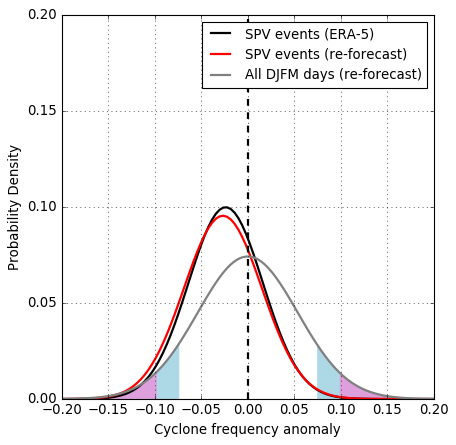

In [31]:
#compare distributions

# tseries_obs_atl_avg
# tseries_model_es_atl_avg

# we do average over 28 days, and over selected region
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

plt.style.use('classic')
fig = plt.figure(figsize=(6,6),facecolor='none')

bins=np.linspace(-1,1,100)
bin_centers = 0.5*(bins[1:] + bins[:-1])
data = np.sort(tseries_obs_atl_avg.flatten())
loc = data.mean()
scale = data.std()
x = np.linspace(-0.2,0.2,100)
pdf = stats.norm.pdf(x,loc=loc, scale=scale)
plt.plot(x,pdf/100,color='black',linewidth=2)
# Plot pdf using sns.lineplot
# ax = sns.lineplot(x=data, y=pdf, color='black',linewidth=2)
    
data2 = np.sort(tseries_model_es_atl_avg.flatten())
loc = data2.mean()
scale = data2.std()
# pdf2 = stats.norm.pdf(data2, loc=loc, scale=scale)
pdf2 = stats.norm.pdf(x,loc=loc, scale=scale)
plt.plot(x,pdf2/100,color='red',linewidth=2)
# Plot pdf using sns.lineplot
# ax = sns.lineplot(x=data2, y=pdf2, color='red',linewidth=2)

# data3 = anom_cyc_jan_atl[:,:,:].flatten()
data3 = np.sort(anom_cyc_jan_atl[:,:,:].flatten())
loc = data3.mean()
scale = data3.std()
x3= np.linspace(-0.2,0.2,100)
pdf3 = stats.norm.pdf(x3, loc=loc, scale=scale)
# pdf3 = stats.norm.pdf(x3,loc=loc, scale=scale)
plt.plot(x3,pdf3/100,color='grey',linewidth=2)
# Plot pdf using sns.lineplot
# ax = sns.lineplot(x=data3, y=pdf3, color='grey',linewidth=2)

# data3=np.linspace(np.min(data3),np.max(data3),100)
p90=np.percentile(data3, 90, axis=0)
plt.fill_between(x3, pdf3/100, where = x3 >=p90, color='lightblue')
p95=np.percentile(data3, 95, axis=0)
plt.fill_between(x3, pdf3/100, where = x3 >=p95, color='plum')
p10=np.percentile(-data3, 10, axis=0)
plt.fill_between(x3, pdf3/100, where = x3 <=p10, color='lightblue')
p5=np.percentile(-data3, 5, axis=0)
plt.fill_between(x3, pdf3/100, where = x3 <=p5, color='plum')


# plt.title('Cyclone frequency response after SPV')
plt.xlabel('Cyclone frequency anomaly')
plt.ylabel('Probability Density')
plt.xlim((-0.20,0.20))
plt.ylim((0,0.20))
ys = np.arange(0,20,1)
vline = np.array([0 for i in range(len(ys))])
plt.plot(vline,ys, 'k--', linewidth=2) 
plt.grid()
plt.legend(['SPV events (ERA-5)','SPV events (re-forecast)','All DJFM days (re-forecast)'],loc='best', fontsize=12)


savelocation="Figures/"
savefileName='pdf_cyc_spv_30to50_vs_all.pdf'
fig.savefig(savelocation+savefileName)


<Figure size 480x480 with 0 Axes>

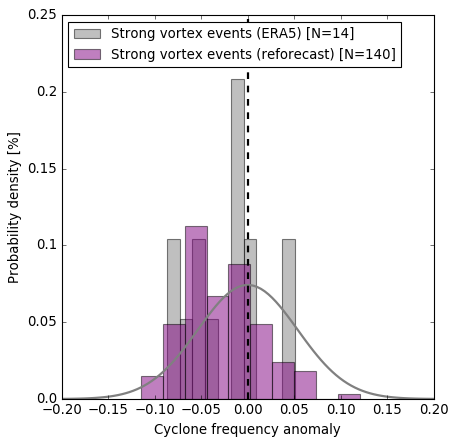

In [32]:
#HIST compare distributions

# tseries_obs_atl_avg
# tseries_model_es_atl_avg

# we do average over 28 days, and over selected region
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

plt.style.use('classic')
fig = plt.figure(figsize=(6,6),facecolor='none')
fig, ax1 = plt.subplots(figsize=(6,6),facecolor='none')
# ax2 = ax1.twinx()

bins=np.linspace(-1,1,100)
bin_centers = 0.5*(bins[1:] + bins[:-1])
data = np.sort(tseries_obs_atl_avg.flatten())
# the histogram of the data
# counts, bins = np.histogram(data, 10)
n, bins, patches = ax1.hist(data, 10, density=True, facecolor='grey', alpha=0.5, label='x')
   
data2 = np.sort(tseries_model_es_atl_avg.flatten())
n, bins, patches = ax1.hist(data2, 10, density=True, facecolor='purple', alpha=0.5, label='y')

# data3 = np.sort(anom_cyc_jan_atl[:,:,:].flatten())
# n, bins, patches = plt.hist(data3, 10, density=True, facecolor='lightblue', alpha=0.5)

# ax1.legend(['All DJFM days (re-forecast)','SSW events (ERA5)','SSW events (re-forecast)'],loc='best', fontsize=12)
legend = ax1.legend(['Strong vortex events (ERA5) [N=14]','Strong vortex events (reforecast) [N=140]'],loc='upper left', fontsize=12)
frame = legend.get_frame()
frame.set_facecolor('white')
# frame.set_alpha(1)

# # data3 = anom_cyc_jan_atl[:,:,:].flatten()
data3 = np.sort(anom_cyc_jan_atl[:,:,:].flatten())
loc = data3.mean()
scale = data3.std()
x3= np.linspace(-0.2,0.2,100)
pdf3 = stats.norm.pdf(x3, loc=loc, scale=scale)
# pdf3 = stats.norm.pdf(x3,loc=loc, scale=scale)
ln3 = ax1.plot(x3,pdf3,color='grey',linewidth=2)
# Plot pdf using sns.lineplot
# ax = sns.lineplot(x=data3, y=pdf3, color='grey',linewidth=2)

# data3=np.linspace(np.min(data3),np.max(data3),100)
# p90=np.percentile(data3, 90, axis=0)
# plt.fill_between(x3, pdf3/100, where = x3 >=p90, color='lightblue')
# p95=np.percentile(data3, 95, axis=0)
# plt.fill_between(x3, pdf3/100, where = x3 >=p95, color='plum')
# p10=np.percentile(-data3, 10, axis=0)
# plt.fill_between(x3, pdf3/100, where = x3 <=p10, color='lightblue')
# p5=np.percentile(-data3, 5, axis=0)
# plt.fill_between(x3, pdf3/100, where = x3 <=p5, color='plum')


# plt.title('Cyclone frequency response after SPV')
plt.xlabel('Cyclone frequency anomaly')
ax1.set_ylabel('Probability density [%]')
# ax2.set_ylabel('Probability density')
plt.xlim((-0.20,0.20))

# 
# locs, labels = xticks()  # Get the current locations and labels.
# xticks(np.arange(0, 1, step=0.2))
y_ticks=np.arange(0, 100, step=5)
ax1.set_yticks(y_ticks)                                                           
ax1.set_yticklabels(y_ticks/100)

ys = np.arange(0,30,1)
vline = np.array([0 for i in range(len(ys))])
ax1.plot(vline,ys, 'k--', linewidth=2) 
# ax2.set_ylim((0,0.2))
ax1.set_ylim((0,25))

savelocation="Figures/"
savefileName='hist_cyc_spv_30to50_vs_all.pdf'
fig.savefig(savelocation+savefileName)




<Figure size 480x480 with 0 Axes>

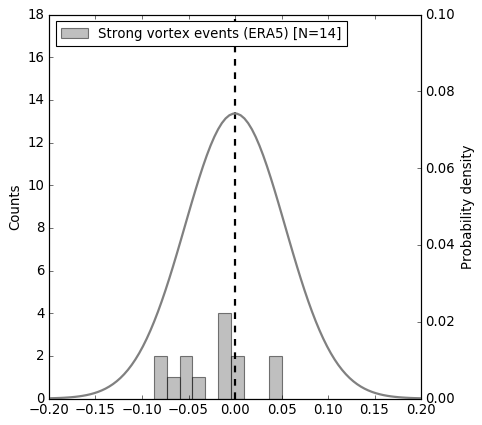

In [33]:
#HIST compare distributions

# tseries_obs_atl_avg
# tseries_model_es_atl_avg

# we do average over 28 days, and over selected region
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

plt.style.use('classic')
fig = plt.figure(figsize=(6,6),facecolor='none')
fig, ax1 = plt.subplots(figsize=(6,6),facecolor='none')
ax2 = ax1.twinx()

bins=np.linspace(-1,1,100)
bin_centers = 0.5*(bins[1:] + bins[:-1])
data = np.sort(tseries_obs_atl_avg.flatten())
# the histogram of the data
n, bins, patches = ax1.hist(data, 10, density=False, facecolor='grey', alpha=0.5, label='x')
   
# data2 = np.sort(tseries_model_es_atl_avg.flatten())
# n, bins, patches = ax1.hist(data2, 10, density=False, facecolor='purple', alpha=0.5, label='y')

# data3 = np.sort(anom_cyc_jan_atl[:,:,:].flatten())
# n, bins, patches = plt.hist(data3, 10, density=True, facecolor='lightblue', alpha=0.5)

# # data3 = anom_cyc_jan_atl[:,:,:].flatten()
data3 = np.sort(anom_cyc_jan_atl[:,:,:].flatten())
loc = data3.mean()
scale = data3.std()
x3= np.linspace(-0.2,0.2,100)
pdf3 = stats.norm.pdf(x3, loc=loc, scale=scale)
# pdf3 = stats.norm.pdf(x3,loc=loc, scale=scale)
ln3 = ax2.plot(x3,pdf3/100,color='grey',linewidth=2)
# Plot pdf using sns.lineplot
# ax = sns.lineplot(x=data3, y=pdf3, color='grey',linewidth=2)


plt.xlabel('Cyclone frequency anomaly')
ax1.set_ylabel('Counts')
ax2.set_ylabel('Probability density')
plt.xlim((-0.20,0.20))
ax1.set_ylim((0,18))
# 

# ax1.legend(['All DJFM days (re-forecast)','SSW events (ERA5)','SSW events (re-forecast)'],loc='best', fontsize=12)
# legend = ax1.legend(['SSW events (ERA5)','SSW events (reforecast)'],loc='upper left', fontsize=12)
legend = ax1.legend(['Strong vortex events (ERA5) [N=14]'],loc='upper left', fontsize=12)
# legend = ax1.legend(['SSW events (ERA5) [N=14]','SSW events (reforecast) [N=140]'],loc='upper left', fontsize=12)
frame = legend.get_frame()
frame.set_facecolor('white')
# frame.set_alpha(1)

ys = np.arange(0,20,1)
vline = np.array([0 for i in range(len(ys))])
ax1.plot(vline,ys, 'k--', linewidth=2) 
ax2.set_ylim((0,0.1))

savelocation="Figures/"
savefileName='hist_cyc_spv_30to50_vs_all_counts_era.pdf'
fig.savefig(savelocation+savefileName)

<Figure size 480x480 with 0 Axes>

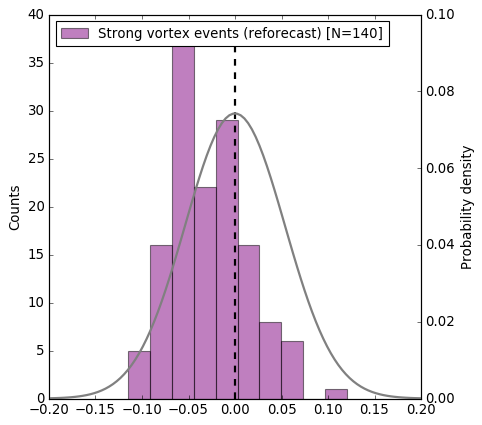

In [34]:
#HIST compare distributions

# tseries_obs_atl_avg
# tseries_model_es_atl_avg

# we do average over 28 days, and over selected region
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

plt.style.use('classic')
fig = plt.figure(figsize=(6,6),facecolor='none')
fig, ax1 = plt.subplots(figsize=(6,6),facecolor='none')
ax2 = ax1.twinx()

bins=np.linspace(-1,1,100)
bin_centers = 0.5*(bins[1:] + bins[:-1])
data = np.sort(tseries_obs_atl_avg.flatten())
# the histogram of the data
# n, bins, patches = ax1.hist(data, 10, density=False, facecolor='grey', alpha=0.5, label='x')
   
data2 = np.sort(tseries_model_es_atl_avg.flatten())
n, bins, patches = ax1.hist(data2, 10, density=False, facecolor='purple', alpha=0.5, label='y')

# data3 = np.sort(anom_cyc_jan_atl[:,:,:].flatten())
# n, bins, patches = plt.hist(data3, 10, density=True, facecolor='lightblue', alpha=0.5)

# # data3 = anom_cyc_jan_atl[:,:,:].flatten()
data3 = np.sort(anom_cyc_jan_atl[:,:,:].flatten())
loc = data3.mean()
scale = data3.std()
x3= np.linspace(-0.2,0.2,100)
pdf3 = stats.norm.pdf(x3, loc=loc, scale=scale)
# pdf3 = stats.norm.pdf(x3,loc=loc, scale=scale)
ln3 = ax2.plot(x3,pdf3/100,color='grey',linewidth=2)
# Plot pdf using sns.lineplot
# ax = sns.lineplot(x=data3, y=pdf3, color='grey',linewidth=2)


plt.xlabel('Cyclone frequency anomaly')
ax1.set_ylabel('Counts')
ax2.set_ylabel('Probability density')
plt.xlim((-0.20,0.20))
ax1.set_ylim((0,40))
# 

# ax1.legend(['All DJFM days (re-forecast)','SSW events (ERA5)','SSW events (re-forecast)'],loc='best', fontsize=12)
# legend = ax1.legend(['SSW events (ERA5)','SSW events (reforecast)'],loc='upper left', fontsize=12)
legend = ax1.legend(['Strong vortex events (reforecast) [N=140]'],loc='upper left', fontsize=12)
# legend = ax1.legend(['SSW events (ERA5) [N=14]','SSW events (reforecast) [N=140]'],loc='upper left', fontsize=12)
frame = legend.get_frame()
frame.set_facecolor('white')
# frame.set_alpha(1)

ys = np.arange(0,40,1)
vline = np.array([0 for i in range(len(ys))])
ax1.plot(vline,ys, 'k--', linewidth=2) 
ax2.set_ylim((0,0.1))

savelocation="Figures/"
savefileName='hist_cyc_spv_30to50_vs_all_counts_model.pdf'
fig.savefig(savelocation+savefileName)

In [35]:
# #HIST compare distributions

# # tseries_obs_atl_avg
# # tseries_model_es_atl_avg

# # we do average over 28 days, and over selected region
# import matplotlib.pyplot as plt
# import seaborn as sns
# from scipy import stats

# plt.style.use('classic')
# fig = plt.figure(figsize=(6,6),facecolor='none')
# fig, ax1 = plt.subplots(figsize=(6,6),facecolor='none')
# ax2 = ax1.twinx()

# bins=np.linspace(-1,1,100)
# bin_centers = 0.5*(bins[1:] + bins[:-1])
# data = np.sort(tseries_obs_atl_avg.flatten())
# # the histogram of the data
# n, bins, patches = ax1.hist(data, 10, density=True, facecolor='grey', alpha=0.5, label='x')
   
# data2 = np.sort(tseries_model_es_atl_avg.flatten())
# n, bins, patches = ax1.hist(data2, 10, density=True, facecolor='purple', alpha=0.5, label='y')

# # data3 = np.sort(anom_cyc_jan_atl[:,:,:].flatten())
# # n, bins, patches = plt.hist(data3, 10, density=True, facecolor='lightblue', alpha=0.5)

# # # data3 = anom_cyc_jan_atl[:,:,:].flatten()
# data3 = np.sort(anom_cyc_jan_atl[:,:,:].flatten())
# loc = data3.mean()
# scale = data3.std()
# x3= np.linspace(-0.2,0.2,100)
# pdf3 = stats.norm.pdf(x3, loc=loc, scale=scale)
# # pdf3 = stats.norm.pdf(x3,loc=loc, scale=scale)
# ln3 = ax2.plot(x3,pdf3/100,color='grey',linewidth=2)
# # Plot pdf using sns.lineplot
# # ax = sns.lineplot(x=data3, y=pdf3, color='grey',linewidth=2)

# # data3=np.linspace(np.min(data3),np.max(data3),100)
# # p90=np.percentile(data3, 90, axis=0)
# # plt.fill_between(x3, pdf3/100, where = x3 >=p90, color='lightblue')
# # p95=np.percentile(data3, 95, axis=0)
# # plt.fill_between(x3, pdf3/100, where = x3 >=p95, color='plum')
# # p10=np.percentile(-data3, 10, axis=0)
# # plt.fill_between(x3, pdf3/100, where = x3 <=p10, color='lightblue')
# # p5=np.percentile(-data3, 5, axis=0)
# # plt.fill_between(x3, pdf3/100, where = x3 <=p5, color='plum')


# # plt.title('Cyclone frequency response after SPV')
# plt.xlabel('Cyclone frequency anomaly')
# ax1.set_ylabel('Counts')
# ax2.set_ylabel('Probability density')
# plt.xlim((-0.20,0.20))
# ax1.set_ylim((0,22))
# # 

# # ax1.legend(['All DJFM days (re-forecast)','SSW events (ERA5)','SSW events (re-forecast)'],loc='best', fontsize=12)
# legend = ax1.legend(['Strong vortex events (ERA5)','Strong vortex events (reforecast)'],loc='upper left', fontsize=12)
# frame = legend.get_frame()
# frame.set_facecolor('white')
# # frame.set_alpha(1)

# ys = np.arange(0,20,1)
# vline = np.array([0 for i in range(len(ys))])
# ax1.plot(vline,ys, 'k--', linewidth=2) 
# ax2.set_ylim((0,0.2))

# savelocation="Figures/"
# savefileName='hist_cyc_spv_30to50_vs_all.pdf'
# fig.savefig(savelocation+savefileName)




In [36]:
from scipy import stats
# stats.kstest(data, stats.norm.cdf)
# sample1=tseries_obs_atl_avg
# sample2=np.mean(tseries_model_es_atl_avg,axis=0)
# sample1=tseries_model_es_atl_avg.flatten()

# for comparing the two districutions, we fit a PDF to data2 (purple bars)
loc = data2.mean()
scale = data2.std()
x2= np.linspace(-0.2,0.2,100)
pdf2 = stats.norm.pdf(x2, loc=loc, scale=scale)

sample1=pdf2
sample2=pdf3
# print(sample1[0:100].shape)
stats.ks_2samp(sample1, sample2)
# stats.kstest(sample1, sample2)

Ks_2sampResult(statistic=0.21000000000000002, pvalue=0.020495314493847068)

In [37]:
counter_how_many_positive2 = np.sum(count_if_correct_pos)
counter_how_many_negative2 = np.sum(count_if_correct_neg)
y=[counter_how_many_positive2,counter_how_many_negative2]
print(y)



[2, 9]


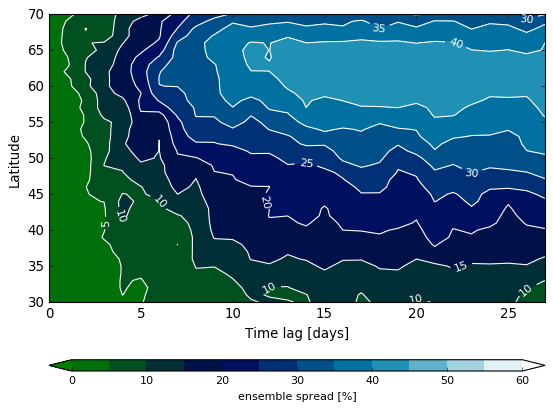

In [38]:
# plot lat vs time, averaged over all events:

# tseries_model_bias_atl_allevents_em
# tseries_model_spread_atl_allevents

# Plot cyclone for all events:
#-----------------------------
plt.style.use('classic')

#create the figure default:
fig = plt.figure(figsize=(8,6),facecolor='none')
ax = plt.axes()
# ax.set_extent([-80, 40, 20, 80], crs=ccrs.PlateCarree())
# ax.add_feature(cfeature.LAND.with_scale('110m'))

color = 'ocean' ##'PuBu' RdBu_r
#colorbar options:
colorbarMin=0
colorbarMax=0.6*100
colorspace=0.05*100
clevel = np.arange(colorbarMin,colorbarMax+colorspace,colorspace)

colorbarMin=0
colorbarMax=50
colorspace=10
clevel2 = np.arange(colorbarMin,colorbarMax+colorspace,colorspace)

def fmt(x):
    s = f"{x:.1f}"
    if s.endswith("0"):
        s = f"{x:.0f}"
    return rf"{s} \%" if plt.rcParams["text.usetex"] else f"{s}"

# set hatching for each level
hatches =  ['', '..']
p_levels = [0.0, 0.05]

timelag=np.arange(0,28)
latx = np.where((latitude >=30) & (latitude <=70))
lat_axis=np.array(latitude[latx[0]])

#plot your field:
h1 = ax.contourf(timelag, lat_axis, 100*np.transpose(tseries_model_spread_atl_allevents), clevel, cmap=color,extend='both')
h2 = ax.contour(timelag, lat_axis, 100*np.transpose(tseries_model_spread_atl_allevents),clevel,colors=['w'],linewidths=1)
ax.clabel(h2, h2.levels, inline=True, fmt=fmt,fontsize=10)
# h1 = ax.contourf(tseries_model_spread_atl_allevents)

# h2 = ax.contour(cyclic_lons2,latitude_c, 100*flag_ensm_clim,clevel2,colors=['black'],linewidths=1)
# ax.clabel(h2, h2.levels, inline=True, fmt=fmt,fontsize=10)
# hs = ax.contourf(cyclic_lons, latitude_c, flag_ensm_stat, levels=p_levels, hatches=hatches,
#                   colors='none',extend='both')


#plot the colorbar:
cbar = plt.colorbar(h1, orientation='horizontal', shrink=1,fraction=0.1,pad=0.15,aspect=40)
cbar.ax.tick_params(labelsize=10) 
colorLabel='ensemble spread [%]' #$FLAG$
cbar.set_label(label=colorLabel,fontsize=10)

# ax.coastlines(color='grey')
# ax.set_extent([-80, 40, 20, 80])
# ax.gridlines(draw_labels=True, dms=True, x_inline=True, y_inline=False)

# add rect xy, width, height
# rect = patches.Rectangle((-60, 35), 60, 20, linewidth=1, edgecolor='k', facecolor='none')
# Add the patch to the Axes
# ax.add_patch(rect)

# ax.set_xticks([45])
matplotlib.pyplot.ylabel("Latitude")
matplotlib.pyplot.xlabel("Time lag [days]")
ax.set_visible(True)
# ax.gridlines(draw_labels=True, dms=True, x_inline=True, y_inline=False)

# gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
# gl.xlabels_top = False
# gl.ylabels_right = False
# gl.xlines = True
# # gl.xlocator = mticker.FixedLocator([-180, -45, 0, 45, 180])
# gl.xformatter = LONGITUDE_FORMATTER
# gl.yformatter = LATITUDE_FORMATTER
# gl.xlabel_style = {'size': 13, 'color': 'black'}
# gl.xlabel_style = {'color': 'red', 'weight': 'bold'}


savelocation="Figures/"
savefileName='spread_vs_time_cyc_anom_spv_events.pdf'
fig.savefig(savelocation+savefileName)
 




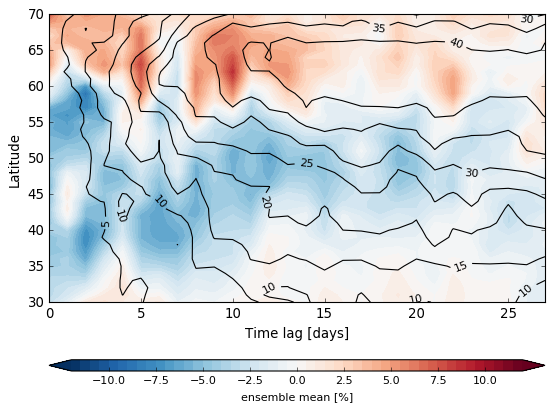

In [39]:
# plot lat vs time, averaged over all events:

# tseries_model_bias_atl_allevents_em
# tseries_model_spread_atl_allevents

# Plot cyclone for all events:
#-----------------------------
plt.style.use('classic')

#create the figure default:
fig = plt.figure(figsize=(8,6),facecolor='none')
ax = plt.axes()
# ax.set_extent([-80, 40, 20, 80], crs=ccrs.PlateCarree())
# ax.add_feature(cfeature.LAND.with_scale('110m'))

color = 'RdBu_r' ##'PuBu' RdBu_r
#colorbar options:
colorbarMin=-12
colorbarMax=12
colorspace=0.5
clevel = np.arange(colorbarMin,colorbarMax+colorspace,colorspace)

colorbarMin=0*100
colorbarMax=0.6*100
colorspace=0.05*100
clevel2 = np.arange(colorbarMin,colorbarMax+colorspace,colorspace)

def fmt(x):
    s = f"{x:.1f}"
    if s.endswith("0"):
        s = f"{x:.0f}"
    return rf"{s} \%" if plt.rcParams["text.usetex"] else f"{s}"

# set hatching for each level
hatches =  ['', '..']
p_levels = [0.0, 0.05]

timelag=np.arange(0,28)
latx = np.where((latitude >=30) & (latitude <=70))
lat_axis=np.array(latitude[latx[0]])

#plot your field:
h1 = ax.contourf(timelag, lat_axis, 100*np.transpose(tseries_model_ensmean_atl_allevents), clevel, cmap=color,extend='both')
# h1 = ax.contourf(timelag, lat_axis, np.transpose(tseries_model_spread_atl_allevents), clevel, cmap=color,extend='both')
h2 = ax.contour(timelag, lat_axis, 100*np.transpose(tseries_model_spread_atl_allevents),clevel2,colors=['black'],linewidths=1)
ax.clabel(h2, h2.levels, inline=True, fmt=fmt,fontsize=10)
# hs = ax.contourf(cyclic_lons, latitude_c, flag_ensm_stat, levels=p_levels, hatches=hatches,
#                   colors='none',extend='both')


#plot the colorbar:
cbar = plt.colorbar(h1, orientation='horizontal', shrink=1,fraction=0.1,pad=0.15,aspect=40)
cbar.ax.tick_params(labelsize=10) 
colorLabel='ensemble mean [%]' #$FLAG$
cbar.set_label(label=colorLabel,fontsize=10)

# ax.coastlines(color='grey')
# ax.set_extent([-80, 40, 20, 80])
# ax.gridlines(draw_labels=True, dms=True, x_inline=True, y_inline=False)

# add rect xy, width, height
# rect = patches.Rectangle((-60, 35), 60, 20, linewidth=1, edgecolor='k', facecolor='none')
# Add the patch to the Axes
# ax.add_patch(rect)

# ax.set_xticks([45])
matplotlib.pyplot.ylabel("Latitude")
matplotlib.pyplot.xlabel("Time lag [days]")
ax.set_visible(True)
# ax.gridlines(draw_labels=True, dms=True, x_inline=True, y_inline=False)

# gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
# gl.xlabels_top = False
# gl.ylabels_right = False
# gl.xlines = True
# # gl.xlocator = mticker.FixedLocator([-180, -45, 0, 45, 180])
# gl.xformatter = LONGITUDE_FORMATTER
# gl.yformatter = LATITUDE_FORMATTER
# gl.xlabel_style = {'size': 13, 'color': 'black'}
# gl.xlabel_style = {'color': 'red', 'weight': 'bold'}


savelocation="Figures/"
savefileName='ensmean_vs_time_cyc_anom_spv_events.pdf'
fig.savefig(savelocation+savefileName)
 




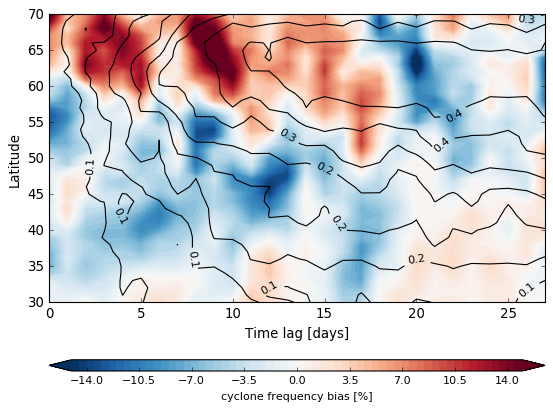

In [40]:
# plot lat vs time, averaged over all events:

# tseries_model_bias_atl_allevents_em
# tseries_model_spread_atl_allevents

# Plot cyclone for all events:
#-----------------------------
plt.style.use('classic')

#create the figure default:
fig = plt.figure(figsize=(8,6),facecolor='none')
ax = plt.axes()
# ax.set_extent([-80, 40, 20, 80], crs=ccrs.PlateCarree())
# ax.add_feature(cfeature.LAND.with_scale('110m'))

color = 'RdBu_r' ##'PuBu' RdBu_r
#colorbar options:
colorbarMin=-15
colorbarMax=15
colorspace=0.5
clevel = np.arange(colorbarMin,colorbarMax+colorspace,colorspace)

colorbarMin=0
colorbarMax=0.6
colorspace=0.05
clevel2 = np.arange(colorbarMin,colorbarMax+colorspace,colorspace)

def fmt(x):
    s = f"{x:.1f}"
    if s.endswith("0"):
        s = f"{x:.0f}"
    return rf"{s} \%" if plt.rcParams["text.usetex"] else f"{s}"

# set hatching for each level
hatches =  ['', '..']
p_levels = [0.0, 0.05]

timelag=np.arange(0,28)
latx = np.where((latitude >=30) & (latitude <=70))
lat_axis=np.array(latitude[latx[0]])

#plot your field:
h1 = ax.contourf(timelag, lat_axis, 100*np.transpose(tseries_model_bias_atl_allevents), clevel, cmap=color,extend='both')
# h1 = ax.contourf(timelag, lat_axis, np.transpose(tseries_model_spread_atl_allevents), clevel, cmap=color,extend='both')
h2 = ax.contour(timelag, lat_axis, np.transpose(tseries_model_spread_atl_allevents),clevel2,colors=['black'],linewidths=1)
ax.clabel(h2, h2.levels, inline=True, fmt=fmt,fontsize=10)
# hs = ax.contourf(cyclic_lons, latitude_c, flag_ensm_stat, levels=p_levels, hatches=hatches,
#                   colors='none',extend='both')


#plot the colorbar:
cbar = plt.colorbar(h1, orientation='horizontal', shrink=1,fraction=0.1,pad=0.15,aspect=40)
cbar.ax.tick_params(labelsize=10) 
colorLabel='cyclone frequency bias [%]' #$FLAG$
cbar.set_label(label=colorLabel,fontsize=10)

# ax.coastlines(color='grey')
# ax.set_extent([-80, 40, 20, 80])
# ax.gridlines(draw_labels=True, dms=True, x_inline=True, y_inline=False)

# add rect xy, width, height
# rect = patches.Rectangle((-60, 35), 60, 20, linewidth=1, edgecolor='k', facecolor='none')
# Add the patch to the Axes
# ax.add_patch(rect)

# ax.set_xticks([45])
matplotlib.pyplot.ylabel("Latitude")
matplotlib.pyplot.xlabel("Time lag [days]")
ax.set_visible(True)
# ax.gridlines(draw_labels=True, dms=True, x_inline=True, y_inline=False)

# gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
# gl.xlabels_top = False
# gl.ylabels_right = False
# gl.xlines = True
# # gl.xlocator = mticker.FixedLocator([-180, -45, 0, 45, 180])
# gl.xformatter = LONGITUDE_FORMATTER
# gl.yformatter = LATITUDE_FORMATTER
# gl.xlabel_style = {'size': 13, 'color': 'black'}
# gl.xlabel_style = {'color': 'red', 'weight': 'bold'}


savelocation="Figures/"
savefileName='bias_vs_time_cyc_anom_spv_events.pdf'
fig.savefig(savelocation+savefileName)
 




In [41]:
# find the correct sign per week of forecast!

# low latitudes PER WEEK:

# check agreement among events - model

arr_len=14
ind_week=0
count_if_correct_per_week=np.zeros((arr_len,4))
count_if_correct_per_week_sign=np.zeros((arr_len,4))
is_canonical_per_week_sign=np.zeros((arr_len,4))
is_canonical_event=np.zeros((arr_len))
counter_how_many_negative_obs = np.zeros((arr_len,4))
counter_how_many_positive_obs = np.zeros((arr_len,4))


# average anomaly over box
# central Atlantic
latidx1_c = np.where((latitude_c >=35) & (latitude_c <=55));
lonidx1_c = np.where((longitude_c >=300) & (longitude_c <=360));
def Reverse(tuples):
    new_tup = tuples[::-1]
    return new_tup

latidx1_c_r = Reverse(latidx1_c[0])
# print(longitude_c[lonidx1_c[0]])
# print(latitude_c[latidx1_c_r])

tseries_obs_region = tseries_obs[:,latidx1_c_r,:,:]
tseries_obs_region = tseries_obs_region[:,:,lonidx1_c[0],:]
tseries_obs_atl = np.mean(np.mean(tseries_obs_region,axis=1),axis=1)

tseries_obs_atl_avg_28d = np.mean(tseries_obs_atl[0:28,:],axis=0)

for i in range(0,arr_len):
        if tseries_obs_atl_avg_28d[i] > 0:
            is_canonical_event[i] = 1
print(is_canonical_event)

for ind_week in range(0,4):
    per_week=np.arange(0+7*ind_week,7+7*ind_week)
    print(per_week)
    #
    # average over selceted period:
    tseries_obs_atl_avg = np.mean(tseries_obs_atl[per_week,:],axis=0)
    #
    # count if obs show positive/negative anomaly
    for i in range(0,arr_len):
        if tseries_obs_atl_avg[i] > 0:
            counter_how_many_positive_obs[i,ind_week] = 1
        if tseries_obs_atl_avg[i] < 0:
            counter_how_many_negative_obs[i,ind_week] = 1
    #        
    count_if_correct = 0
    # count how many members (in %) show positive/negative anomaly
    # average anomaly over box
    # central Atlantic
    latidx1 = np.where((latitude >=35) & (latitude <=55))
    lonidx1 = np.where((longitude >=300) & (longitude <360)) 
    tseries_model_es_region = tseries_model_es[:,:,latidx1[0],:,:]
    tseries_model_es_region = tseries_model_es_region[:,:,:,lonidx1[0],:]
    tseries_model_es_atl = np.mean(np.mean(tseries_model_es_region,axis=2),axis=2)
    #
    # average over selceted period:
    tseries_model_es_atl_avg = np.mean(tseries_model_es_atl[:,per_week,:],axis=1)
    #
    # count how many members (in %)
    for i in range(arr_len):
            counter_how_many_positive_model[i] = np.count_nonzero(tseries_model_es_atl_avg[:,i] > 0)
            counter_how_many_negative_model[i] = np.count_nonzero(tseries_model_es_atl_avg[:,i] < 0)
            # check if the sign of the anomaly is the neg/pos
            if counter_how_many_positive_obs[i,ind_week] == 1:            
                count_if_correct = counter_how_many_positive_model[i]
                count_if_correct_per_week_sign[i,ind_week] = (count_if_correct / 10)*100
                count_if_correct_per_week[i,ind_week] = (count_if_correct / 10)*100;
                is_canonical_per_week_sign[i,ind_week] = 1
            if counter_how_many_negative_obs[i,ind_week] == 1:            
                count_if_correct = counter_how_many_negative_model[i]
                count_if_correct_per_week_sign[i,ind_week] = -(count_if_correct / 10)*100
                count_if_correct_per_week[i,ind_week] = (count_if_correct / 10)*100;
    
    

print(count_if_correct_per_week)
print(count_if_correct_per_week_sign)
print(is_canonical_per_week_sign)




[0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0.]
[0 1 2 3 4 5 6]
[ 7  8  9 10 11 12 13]
[14 15 16 17 18 19 20]
[21 22 23 24 25 26 27]
[[ 70.  90. 100.  50.]
 [100. 100.  90.  60.]
 [100. 100.  40.  30.]
 [100.  40.  40.  30.]
 [100. 100.  40.  20.]
 [100.  90.  70.  60.]
 [ 70.  80.  90.  30.]
 [100.  70.  40.  60.]
 [100.  50.  70.  70.]
 [100.  40.  30.  70.]
 [100.  20.  80.   0.]
 [100. 100.  80.  60.]
 [100.  50.  60.  60.]
 [ 20. 100.  80.  40.]]
[[ -70.  -90. -100.  -50.]
 [-100. -100.  -90.  -60.]
 [-100. -100.  -40.   30.]
 [-100.   40.  -40.  -30.]
 [-100. -100.   40.   20.]
 [-100.  -90.  -70.  -60.]
 [  70.  -80.  -90.   30.]
 [ 100.   70.  -40.   60.]
 [ 100.  -50.  -70.  -70.]
 [-100.  -40.   30.  -70.]
 [-100.   20.  -80.    0.]
 [-100. -100.  -80.  -60.]
 [-100.   50.  -60.   60.]
 [ -20. -100.  -80.  -40.]]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 1. 1.]
 [0. 0. 0. 0.]
 [1. 0. 0. 1.]
 [1. 1. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 1.]
 [0.

[[ 20. 100.  80.  40.]
 [100.  50.  60.  60.]
 [100. 100.  80.  60.]
 [100.  20.  80.   0.]
 [100.  40.  30.  70.]
 [100.  50.  70.  70.]
 [100.  70.  40.  60.]
 [ 70.  80.  90.  30.]
 [100.  90.  70.  60.]
 [100. 100.  40.  20.]
 [100.  40.  40.  30.]
 [100. 100.  40.  30.]
 [100. 100.  90.  60.]
 [ 70.  90. 100.  50.]]


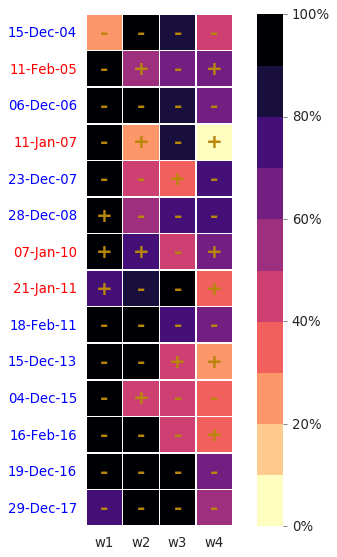

In [42]:
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
from pylab import *

plt.style.use('classic')
fig = plt.figure(figsize=(8,8),facecolor='none')

labels = ['29-Dec-17', '19-Dec-16', '16-Feb-16', '04-Dec-15', '15-Dec-13','18-Feb-11',\
          '21-Jan-11','07-Jan-10','28-Dec-08','23-Dec-07',\
          '11-Jan-07','06-Dec-06','11-Feb-05','15-Dec-04']

labels_rev = labels[::-1];
labels_weeks = ['w1','w2','w3','w4']
print(count_if_correct_per_week[::-1])

cmap = cm.get_cmap('magma_r', 10)  

# corr = np.corrcoef(np.random.randn(10, 200))

# mask = np.zeros_like(corrs)
# mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(count_if_correct_per_week[::-1], vmin=0, vmax=100, square=True,\
                     linewidth=0.5, cmap=cmap, cbar_kws={'format': '%.0f%%', 'ticks': np.arange(0,101,20)})
#     plt.show()
    y = np.arange(len(labels))  # the label locations
    ax.set_yticks(y+0.5)
    ax.set_yticklabels(labels_rev, fontsize=12)
    plt.yticks(rotation=0)
    ax.set_xticklabels(labels_weeks, fontsize=12)
    

is_canonical_per_week_sign_r=is_canonical_per_week_sign[::-1]
for i, c in enumerate(is_canonical_per_week_sign_r):
    for j, v in enumerate(c):
        if v == 1:
            ax.text(j + 0.5, i + 0.5, '+', color='darkgoldenrod', size=18, ha='center', va='center', weight='bold')
        if v == 0:
            ax.text(j + 0.5, i + 0.5, '-', color='darkgoldenrod', size=18, ha='center', va='center', weight='bold')

            colors = ['b','r','b','r','b','b','r','r','b','b','b','b','b','b']
for xtick, color in zip(ax.get_yticklabels(), colors):
    xtick.set_color(color)

savelocation="Figures/"
savefileName='heatmap_test_cyc_spv_by_week_30to50.pdf'
fig.savefig(savelocation+savefileName)




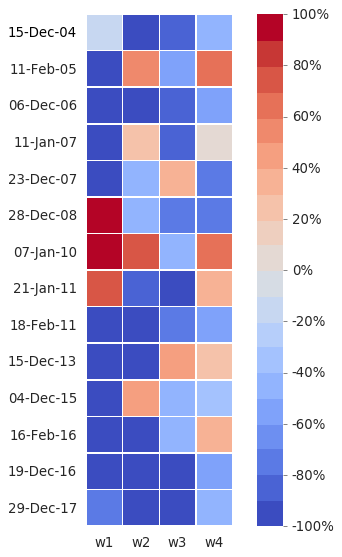

In [43]:
# only for canonical events
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
import pandas as pd
import matplotlib as mpl
from pylab import *

plt.style.use('classic')
fig = plt.figure(figsize=(8,8),facecolor='none')

labels = ['29-Dec-17', '19-Dec-16', '16-Feb-16', '04-Dec-15', '15-Dec-13','18-Feb-11',\
          '21-Jan-11','07-Jan-10','28-Dec-08','23-Dec-07',\
          '11-Jan-07','06-Dec-06','11-Feb-05','15-Dec-04']

labels_rev = labels[::-1];
labels_weeks = ['w1','w2','w3','w4']

cmap = cm.get_cmap('coolwarm', 20)  
# sns.palplot(sns.color_palette("coolwarm", 12))

# corr = np.corrcoef(np.random.randn(10, 200))

# mask = np.zeros_like(corrs)
# mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(count_if_correct_per_week_sign[::-1], center=0, vmin=-100, vmax=100, square=True,\
                     linewidth=0.5, cmap=cmap, cbar_kws={'format': '%.0f%%', 'ticks': np.arange(-100,101,20)})
#        cmap="YlGnBu")

    y = np.arange(len(labels))  # the label locations
    ax.set_yticks(y+0.5)
    ax.set_yticklabels(labels_rev, fontsize=12)
    plt.yticks(rotation=0)
    ax.set_xticklabels(labels_weeks, fontsize=12)
    # cbar.set_clim(-110,110)
    
# colors = ['r','r','r','b','r','r','b','b','r','r','r','r','r','b']
# for xtick, color in zip(ax.get_yticklabels(), colors):
#     xtick.set_color(color)
for xtick, color in zip(ax.get_yticklabels(), 'k'):
     xtick.set_color(color)

savelocation="Figures/"
savefileName='heatmap_test_cyc_spv_by_week_30to50_can.pdf'
fig.savefig(savelocation+savefileName)




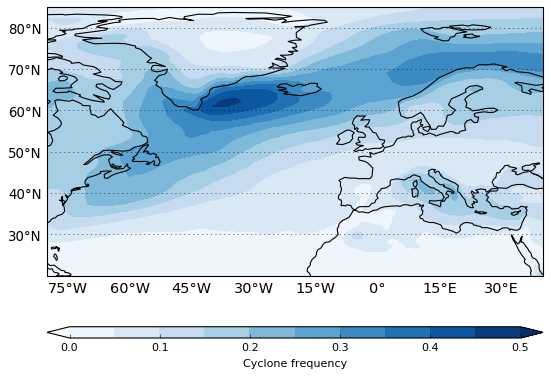

In [44]:
# Just plot clim

# Plot cyclone for all events:
#-----------------------------
plt.style.use('classic')

#create the figure default:
fig = plt.figure(figsize=(8,8),facecolor='none')
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-80, 40, 20, 80], crs=ccrs.PlateCarree())
# ax.add_feature(cfeature.LAND.with_scale('110m'))

color = 'Blues' ##'PuBu' 
#colorbar options:
colorbarMin=0
colorbarMax=1
colorspace=0.2
clevel = np.arange(colorbarMin,colorbarMax+colorspace,colorspace)

colorbarMin=0
colorbarMax=0.5
colorspace=0.05
clevel2 = np.arange(colorbarMin,colorbarMax+colorspace,colorspace)


#plot your field:
# flag_anom_sel, cyclic_lons = add_cyclic_point(cyc_clim_obs, coord=longitude_c)
# flag_ensm_clim, cyclic_lons2 = add_cyclic_point(cyc_clim_obs, coord=longitude_c2)

# h1 = ax.contourf(cyclic_lons2,latitude_c2, flag_ensm_clim,clevel2, cmap=color,extend='both')
h2 = ax.contourf(longitude_c2,latitude_c2, cyc_clim_obs,clevel2, cmap=color,extend='both')
# 

#plot the colorbar:
cbar = plt.colorbar(h2, orientation='horizontal', shrink=1,fraction=0.1,pad=0.1,aspect=40)
cbar.ax.tick_params(labelsize=10) 
colorLabel='Cyclone frequency' #$FLAG$
cbar.set_label(label=colorLabel,fontsize=10)

ax.coastlines()
ax.set_extent([-80, 40, 20, 80])
# ax.gridlines(draw_labels=True, dms=True, x_inline=True, y_inline=False)


ax.set_xticks([45])
# matplotlib.pyplot.xlabel("Longitude")
# matplotlib.pyplot.ylabel("Latitude")
ax.set_visible(True)

# someX, someY = 20, 20
# fig,ax = plt.subplots()
# currentAxis = plt.gca()
# currentAxis.add_patch(Rectangle((someX - 2, someY - 2), 0.2, 0.2,alpha=1, facecolor='none'))

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
gl.xlabels_top = False
gl.ylabels_right = False
gl.xlines = False
# gl.xlocator = mticker.FixedLocator([-180, -45, 0, 45, 180])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 13, 'color': 'black'}
# gl.xlabel_style = {'color': 'red', 'weight': 'bold'}


savelocation="Figures/"
savefileName='cyc_freq_obs.pdf'
fig.savefig(savelocation+savefileName)



In [45]:
latidx1 = np.where((latitude >=35) & (latitude <=55))
lonidx1 = (np.where((longitude >=0) & (longitude <32.5)),np.where((longitude >=350) & (longitude <360))) 
lonidx1

((array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
         17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),),
 (array([350, 351, 352, 353, 354, 355, 356, 357, 358, 359]),))

(10, 28, 181, 360, 14)
(10, 28, 14)
(28, 181, 360, 14)
(28, 14)
0 response is negative
1 response is negative
2 response is negative
3 response is negative
4 response is negative
5 response is negative
6 response is positive
7 response is positive
8 response is negative
9 response is negative
10 response is positive
11 response is negative
12 response is positive
13 response is negative
[  0.  80.  30. 100.  80. 100.  30.  40.  50.  90.  10.  80.  90.  80.]
(10, 20, 181, 360, 3)
(10, 20, 3)
[100. 100. 100. 100. 100. 100.  nan  nan 100. 100.  nan 100.  nan 100.]
[ nan  nan  nan  nan  nan  nan 100. 100.  nan  nan 100.  nan 100.  nan]


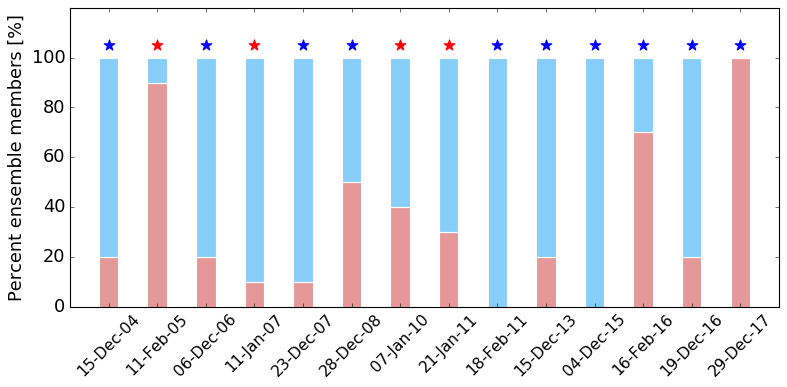

[0.25, 0.7, 0]
[1, 7]
[4, 10]


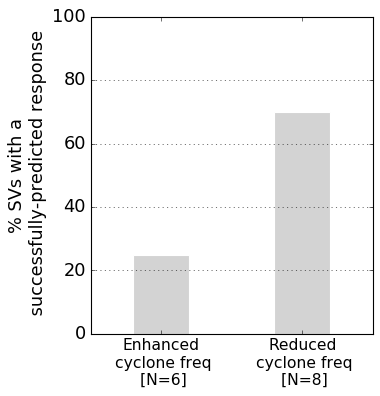

In [46]:
# euro box

# subtropical latitudes:

# check agreement among events - model
print(tseries_model_es.shape)

# average anomaly over box
# central Atlantic
latidx1 = np.where((latitude >=35) & (latitude <=60))
lonidx1 = np.where((longitude >=0) & (longitude <32.5))
lonidx2 = np.where((longitude >=350) & (longitude <360))
lonmask = np.concatenate( (np.array(lonidx1[0]), np.array(lonidx2[0])) )
tseries_model_es_region = tseries_model_es[:,:,latidx1[0],:,:]
tseries_model_es_region = tseries_model_es_region[:,:,:,lonmask,:]
tseries_model_es_atl = np.mean(np.mean(tseries_model_es_region,axis=2),axis=2)
print(tseries_model_es_atl.shape)

# average over selceted period:
tseries_model_es_atl_avg = np.mean(tseries_model_es_atl,axis=1)

counter_how_many_negative_model = np.zeros_like(range(0,arr_len))
counter_how_many_positive_model = np.zeros_like(range(0,arr_len))
# count how many members (in %) show positive/negative anomaly
for ii in range(0,arr_len):
    # print(ii)
    counter = 0*np.arange(2)
    counter[0] = np.count_nonzero(tseries_model_es_atl_avg[:,ii] < 0)
    counter[1] = np.count_nonzero(tseries_model_es_atl_avg[:,ii] > 0)
    counter_how_many_negative_model[ii]=counter[0]
    counter_how_many_positive_model[ii]=counter[1]
    # return counter;

# 

# check agreement among events - obs
print(tseries_obs.shape)

# average anomaly over box
# central Atlantic
latidx1 = np.where((latitude >=35) & (latitude <=60))
lonidx1 = np.where((longitude >=0) & (longitude <32.5))
lonidx2 = np.where((longitude >=350) & (longitude <360))
lonmask = np.concatenate( (np.array(lonidx1[0]), np.array(lonidx2[0])) )
tseries_model_es_region = tseries_model_es[:,:,latidx1[0],:,:]
tseries_model_es_region = tseries_model_es_region[:,:,:,lonmask,:]
tseries_obs_atl = np.mean(np.mean(tseries_obs_region,axis=1),axis=1)
print(tseries_obs_atl.shape)

# average over selceted period:
tseries_obs_atl_avg = np.mean(tseries_obs_atl,axis=0)

counter_how_many_negative_obs = np.zeros_like(range(0,arr_len))
counter_how_many_positive_obs = np.zeros_like(range(0,arr_len))
# count how many members (in %) show positive/negative anomaly
for ii in range(0,arr_len):
    # print(ii)
    counter = 0*np.arange(2)
    counter[0] = np.count_nonzero(tseries_obs_atl_avg[ii] < 0)
    counter[1] = np.count_nonzero(tseries_obs_atl_avg[ii] > 0)
    counter_how_many_negative_obs[ii]=counter[0]
    counter_how_many_positive_obs[ii]=counter[1]
    # return counter;
    

count_if_correct = 0*np.arange(arr_len);
count_if_correct_pos=0*np.arange(arr_len)
count_if_correct_neg=0*np.arange(arr_len)
# check if the sign of the anomaly is the same
for i in range(arr_len):
    if counter_how_many_positive_obs[i] == 1:
        print(i, "response is positive")
        count_if_correct[i] = counter_how_many_positive_model[i];
        if counter_how_many_positive_model[i] > 5:
            count_if_correct_pos[i] = 1
    if counter_how_many_negative_obs[i] == 1:
        print(i, "response is negative")
        count_if_correct[i] = counter_how_many_negative_model[i];
        if counter_how_many_negative_model[i] > 5:
            count_if_correct_neg[i] = 1
        
count_if_correct1 = (count_if_correct / 10)*100;

print(count_if_correct1)

arr_len_pos = np.sum(counter_how_many_positive_obs)
arr_len_neg = np.sum(counter_how_many_negative_obs)

# load all 28-day means in Jan
%store -r anom_cyc_per_lead_date_djf
print(anom_cyc_per_lead_date_djf.shape)
anom_cyc_jan_es_region = anom_cyc_per_lead_date_djf[:,:,latidx1[0],:,:]
anom_cyc_jan_es_region = anom_cyc_jan_es_region[:,:,:,lonidx1[0],:]
anom_cyc_jan_atl = np.mean(np.mean(anom_cyc_jan_es_region,axis=2),axis=2)
print(anom_cyc_jan_atl.shape)


y_star_neg=np.nan*np.copy(counter_how_many_negative_obs)
y_star_pos=np.nan*np.copy(counter_how_many_positive_obs)

y_star_pos = np.where(counter_how_many_negative_obs==0, 100, np.nan)
y_star_neg = np.where(counter_how_many_negative_obs==0, np.nan, 100)

print(y_star_neg)
print(y_star_pos)
# -----------------
# -----------------
# -----------------
# -----------------
# this plot shows how many negative / positive per SPV

labels = ['29-Dec-17', '19-Dec-16', '16-Feb-16', '04-Dec-15', '15-Dec-13','18-Feb-11',\
          '21-Jan-11','07-Jan-10','28-Dec-08','23-Dec-07',\
          '11-Jan-07','06-Dec-06','11-Feb-05','15-Dec-04']
labels_rev = labels[::-1];
# pos:[0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0]
# labels_rev_pos=['20-Mar-00','11-Feb-01','','','5-Jan-04','21-Jan-06','','22-Feb-08',\
#                '24-Jan-09','09-Feb-10','24-Mar-10','6-Jan-13','12-Feb-18','']
#neg: ,'18-Jan-03','30-Dec-01','24-Feb-07','2-Jan-19'

x = np.arange(len(labels))  # the label locations
width = 0.5  # the width of the bars
counter_how_many_positive2 = (counter_how_many_positive_model[::-1]/10)*100
counter_how_many_negative2 = (counter_how_many_negative_model[::-1]/10)*100


fig, ax = plt.subplots(figsize=(10,5),facecolor='none')
# fig = plt.figure(facecolor='none')

rects1 = ax.bar(x[0:14] , counter_how_many_positive2[0:14], width=0.4, \
                color=(0.8, 0.2, 0.2, 0.5),edgecolor='w',label='Increased cyclone frequency', align='center')
rects2 = ax.bar(x[0:14] , counter_how_many_negative2[0:14], width=0.4, \
                bottom=counter_how_many_positive2[0:14], color='lightskyblue',edgecolor='w',label='Reduced cyclone frequency', align='center')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percent ensemble members [%]', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(labels_rev, fontsize=14,rotation=45)
# ax.set_xticklabels(labels_rev_pos, fontsize=14,rotation=45,fontweight='bold')
# ax.legend(loc='best', fontsize=10)
ax.set_yticklabels([0,20,40,60,80,100], fontsize=16)
ax.scatter(x, y_star_neg[::-1]+5, s=100, marker='*', color='blue', zorder=3)
ax.scatter(x, y_star_pos[::-1]+5, s=100, marker='*', color='red', zorder=3)

fig.tight_layout()
plt.ylim(0,120)
plt.xlim(-0.8,13.8)
# plt.grid(axis='y')
plt.show()

savelocation="Figures/"
savefileName='bar_cyc_anom_atl_spv_show_sign_model_EUR.pdf'
fig.savefig(savelocation+savefileName)

# ---------


# ---------


# ---------


x=[0,1] #np.arange(2)
width = 0.4  # the width of the bars
c_positive2 = np.sum(count_if_correct_pos)
c_negative2 = np.sum(count_if_correct_neg)
y=[c_positive2/arr_len_pos,c_negative2/arr_len_neg,0]
# y=[c_positive2/arr_len,c_negative2/arr_len,(arr_len-c_positive2-c_negative2)/arr_len]

print(y)
print([c_positive2,c_negative2])
print([arr_len_pos,arr_len_neg])


fig, ax = plt.subplots(figsize=(5,5),facecolor='none')

# rects1 = ax.bar(x[0] , 100*y[0], width, color=(0.8, 0.2, 0.2, 0.5),edgecolor='w',label='Increased cyclone frequency')
# rects2 = ax.bar(x[1] , 100*y[1], width, color=(0.2, 0.4, 0.6, 0.6),edgecolor='w',label='Reduced cyclone frequency')
rects1 = ax.bar(x[0] , 100*y[0], width, color='lightgrey',edgecolor='w',label='Increased cyclone frequency')
rects2 = ax.bar(x[1] , 100*y[1], width, color='lightgrey',edgecolor='w',label='Reduced cyclone frequency')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('% SVs with a\n successfully-predicted response', fontsize=16)
# ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(['Enhanced\n cyclone freq\n [N=6]','Reduced\n cyclone freq\n [N=8]'], fontsize=14,rotation=0)
# ax.legend(loc='best', fontsize=14)
# ax.set_yticklabels([0,3,6,9,12,15], fontsize=16)
ax.set_yticklabels([0,20,40,60,80,100], fontsize=16)
# ax.set_yticklabels([0,0.2,0.40,0.60,0.80,1.0], fontsize=16)
fig.tight_layout()
plt.ylim(0,100)
plt.xlim(-0.5,1.5)
plt.grid(axis='y') 
plt.show()

savelocation="Figures/"
savefileName='bar_cyc_anom_atl_spv_30to50_num_events_EUR.pdf'
fig.savefig(savelocation+savefileName)





